# Get 1 good MSD from 1 trial
Tim Tyree<br>
12.17.2020

In [9]:
from lib.my_initialization import *
from lib import *

%autocall 1
%load_ext autoreload
%autoreload 2
# awareness&chill

Automatic calling is: Smart
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

#automate the boring stuff
# from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
    
#load the libraries
from lib import *
import dask.bag as db

%autocall 1
%load_ext autoreload
%autoreload 2
# awareness&chill

Automatic calling is: Smart
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
darkmode=False
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# Get 1 good trajectory from 1 trial

In [2]:
#find file interactively
# print("please select a file from within the desired folder.")
# file = search_for_file()
# file = '/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ic-in/ic_200x200.001.11.npz'
input_file_name = "/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4_archive/Log/ic_200x200.001.11_log.csv"



In [3]:
output_file_name = generate_track_tips_pbc(input_file_name, save_fn=None)

Frame 3811: 4 trajectories present.


In [4]:
df = pd.read_csv(output_file_name)

In [6]:
df.columns

Index(['t', 'n', 'x', 'y', 'theta', 'grad_ux', 'grad_uy', 'grad_vx', 'grad_vy',
       'v', 'f', 's', 'dvdt', 'dfdt', 'dsdt', 'frame', 'particle'],
      dtype='object')

In [25]:
#select the longest trajectory
s = df.groupby('particle').t.count()
s = s.sort_values(ascending=False)
pid_longest = s.index.values[0]
d = df[df.particle==pid_longest]

print(pid_longest)
print(s.head())

218
particle
218    1850
219    1850
195    1700
194    1700
96     1444
Name: t, dtype: int64


In [46]:
#compute the speed of this longest trajectory using pbc
width = 200; height = 200;
distance_L2_pbc = get_distance_L2_pbc(width,height)
DT = np.mean(d.t.diff().dropna().values) #ms per frame
DS = 5/200 #cm per pixels

In [51]:
x_values = d.x.values
y_values = d.y.values
N = x_values.shape[0]
spd_lst = []
for i in range(N-1):
    #compute a speed for i = 0,1,2,...,N-1
    pt_nxt = np.array((x_values[i+1],y_values[i+1]))
    pt_prv = np.array((x_values[i],y_values[i]))
    spd = distance_L2_pbc(pt_nxt,pt_prv)*DS/DT #pixels per ms
    spd_lst.append(spd)

In [52]:
# import inspect
# print(inspect.getsource(get_distance_L2_pbc))

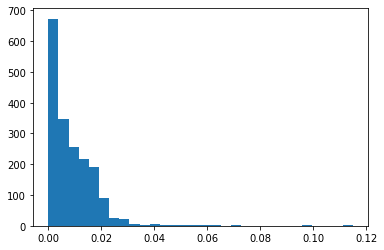

In [53]:
#identify any unreasonable speeds
sarr = np.array(spd_lst)
plt.hist(sarr, bins=30)
plt.show()

In [54]:
min_spd_jump = 0.1#0.06
barr = sarr>min_spd_jump
barr.any()

True

In [55]:
np.argwhere(min_spd_jump<sarr)

array([[1055],
       [1056]])

In [67]:
dd = d.reset_index()
dd.iloc[1050:1060]

,index,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt,frame,particle
1050,54385,2891.0,10,74.99498,24.50554,2.58878,1.28331,0.15079,1.78230,-1.43129,0.35983,0.13508,0.83881,0.00293,-0.01037,-0.00105,2891,218
1051,54400,2892.0,10,74.93767,25.53564,2.22591,1.34769,-0.00213,1.87445,-1.60512,0.36379,0.13383,0.83739,0.00245,-0.01027,-0.00105,2892,218
1052,54412,2893.0,10,75.01928,26.63973,2.54378,1.42583,-0.18391,2.09475,-2.08434,0.45769,0.10932,0.83344,-0.00383,-0.00839,-0.00104,2893,218
1053,54432,2894.0,10,75.30656,27.90478,2.03426,1.51744,-0.39212,2.32174,-2.58781,0.45907,0.10821,0.83311,-0.00356,-0.00830,-0.00104,2894,218
1054,54453,2895.0,10,75.93289,29.33195,NaN,1.77723,-1.00571,3.03434,-4.29371,0.33317,0.14298,0.83908,0.00349,-0.01097,-0.00105,2895,218
1055,54479,2896.0,10,77.09803,30.91954,NaN,2.23294,-2.06932,5.04727,-9.09682,0.48615,0.09988,0.83319,-0.00450,-0.00767,-0.00104,2896,218
1056,54508,2897.0,10,80.99624,33.35312,NaN,-26.22259,67.10875,-3.56114,12.03777,0.33429,0.12849,0.83616,0.00287,-0.00986,-0.00105,2897,218
1057,54513,2898.0,10,85.40044,34.22292,2.92913,-0.41583,4.55222,0.39295,2.50497,0.38533,0.10274,0.83659,0.00054,-0.00788,-0.00105,2898,218
1058,54546,2899.0,10,87.41877,34.38556,2.85675,-0.34975,4.44971,0.73204,1.67439,0.39746,0.09682,0.83858,0.00009,-0.00743,-0.00105,2899,218
1059,54571,2900.0,10,88.45332,34.48548,2.72527,-0.62380,5.18272,0.84098,1.40261,0.40230,0.09382,0.83977,0.00001,-0.00720,-0.00105,2900,218


In [61]:
x_values[1055:1059]

array([77.09803, 80.99624, 85.40044, 87.41877])

In [65]:
x_values[1055:1059]

array([77.09803, 80.99624, 85.40044, 87.41877])

In [66]:
x_values.shape

(1850,)

__Result__ the longest lasting tip from this trial lasts 1.85 seconds.  It's max speed is roughly 0.11.  This largest speed has theta==Nan for 3 consecutive locations, and the nearby trajectory has theta>2. for all observations.

- DONE: plot this trajectory and verify that it looks reasonable
- TODO: compute the MSD for this trajectory, write result to txt file (hint: with open(fnout) as file:)
- TODO: turn ^this into a quick accept/reject MSD recording file, and cycle through the N=171 files, manually verifying each one.  Keep track of files I reject in a separate file



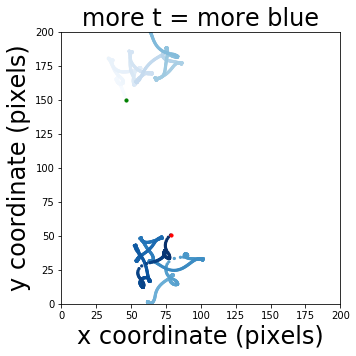

In [73]:
#plot the xy trajectory for longliving tips
saving = False
fontsize=24
df_traj = d.copy()
col = "t"#'theta'
# df_traj = df.query('t < 110 and t > 90').copy()
# df_traj = df.query('t > 500').copy()
# df_traj = df.copy()
# savefig_dir = f'{nb_dir}/Figures/lifetime_analysis'
# savefig_fn = data_fn.replace('.csv',f'_mistake_still_exists?_sigma_{sigma}_threshold_{threshold}.png')

xmin=0; ymin=0; xmax=width; ymax=height; 
axis = [xmin,xmax,ymin,ymax]

fig, ax = plt.subplots(figsize=(5,5))
for pid in list(set(df_traj['particle'].values)):
    x_values ,y_values, c_values = df_traj[(df_traj.particle==pid)][['x','y', col]].values.T 
    plt.scatter(x_values,y_values, s=5,#s=0.1
                c=c_values, vmin = np.min(c_values), vmax = np.max(c_values), cmap="Blues")
    
    plt.scatter([x_values[0]],[y_values[0]], s=10,color='green')
    plt.scatter([x_values[-1]],[y_values[-1]], s=10,color='red')
plt.axis(axis)
plt.title(f'''more {col} = more blue''', fontsize=fontsize)
ax.set_xlabel('x coordinate (pixels)', fontsize=fontsize)
ax.set_ylabel('y coordinate (pixels)', fontsize=fontsize)
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_dir)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}.")

In [75]:
# compute the MSD for this trajectory,
msd_series = trackpy.motion.emsd(df_traj,mpp=1., fps=1.)
msd_series.head()

lagt
1.0     21.816803
2.0     43.995041
3.0     66.507777
4.0     89.314673
5.0    112.386659
Name: msd, dtype: float64

In [ ]:
#TODO: make trackpy.motion.emsd is using distance_L2_pbc
kwa

In [850]:
traj2 = pd.concat([traj.query(f'particle == {pid}') for pid in lst_pid_long_enough])

In [851]:
fps = 1/h*10**3 #frames per second
mpp = 5/200*10**4 #microns per pixel

In [852]:

# msd_series = trackpy.motion.emsd(traj,mpp=mpp, fps=fps)
msd_series = trackpy.motion.emsd(traj2,mpp=mpp, fps=fps)
x_values = msd_series.index.values*10**3
y_values = msd_series.values/10**6

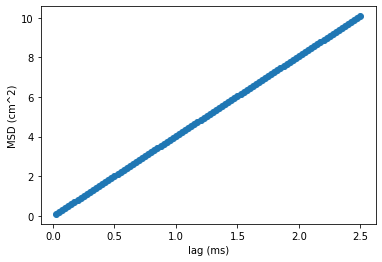

In [853]:
# plt.plot(msd_series.index.values,msd_series.values)
plt.scatter(x=x_values,y=y_values)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('lag (ms)')
plt.ylabel('MSD (cm^2)')
plt.show()

In [857]:
msd_series.index.values

array([2.500e-05, 5.000e-05, 7.500e-05, 1.000e-04, 1.250e-04, 1.500e-04,
       1.750e-04, 2.000e-04, 2.250e-04, 2.500e-04, 2.750e-04, 3.000e-04,
       3.250e-04, 3.500e-04, 3.750e-04, 4.000e-04, 4.250e-04, 4.500e-04,
       4.750e-04, 5.000e-04, 5.250e-04, 5.500e-04, 5.750e-04, 6.000e-04,
       6.250e-04, 6.500e-04, 6.750e-04, 7.000e-04, 7.250e-04, 7.500e-04,
       7.750e-04, 8.000e-04, 8.250e-04, 8.500e-04, 8.750e-04, 9.000e-04,
       9.250e-04, 9.500e-04, 9.750e-04, 1.000e-03, 1.025e-03, 1.050e-03,
       1.075e-03, 1.100e-03, 1.125e-03, 1.150e-03, 1.175e-03, 1.200e-03,
       1.225e-03, 1.250e-03, 1.275e-03, 1.300e-03, 1.325e-03, 1.350e-03,
       1.375e-03, 1.400e-03, 1.425e-03, 1.450e-03, 1.475e-03, 1.500e-03,
       1.525e-03, 1.550e-03, 1.575e-03, 1.600e-03, 1.625e-03, 1.650e-03,
       1.675e-03, 1.700e-03, 1.725e-03, 1.750e-03, 1.775e-03, 1.800e-03,
       1.825e-03, 1.850e-03, 1.875e-03, 1.900e-03, 1.925e-03, 1.950e-03,
       1.975e-03, 2.000e-03, 2.025e-03, 2.050e-03, 

In [82]:
mem=2; sr=400;#width=200, height=200, 
adaptive_step=0.5;adaptive_stop=1e-5#, **kwargs

distance_L2_pbc = get_distance_L2_pbc(width,height)

link_kwargs = {
#     'neighbor_strategy' : 'BTree',
#     'adaptive_step':adaptive_step,
#     'adaptive_stop': adaptive_stop,
    'dist_func'         : distance_L2_pbc,
    'memory': mem,
    'search_range':sr
}

traj = trackpy.motion.emsd(
    df_traj,**link_kwargs)

TypeError: emsd() got an unexpected keyword argument 'dist_func'

In [83]:
trackpy.motion.msd?

# (ignore) pbc enforced msd is not implemented.
- TODO: implement it on this trajectory 
- TODO: simply generalize ^that.  hint: square grid indexed by winding_number_x and winding_number_y

In [84]:
x_values
y_values

array([150.30597, 152.6806 , 154.25487, ...,  47.6068 ,  48.99844,
        50.59024])

In [85]:
from inspect import getsource

print (getsource (trackpy.motion._msd_fft))

#this takes time O(N^2), and ^they present an O(N) method that uses FFT.  Howeever, my task is short, and it needs to explicitly obey periodic boundary conditions, which would mean I would need to understand their complicated method.


In [93]:
# from https://stackoverflow.com/questions/34222272/computing-mean-square-displacement-using-python-and-fft#34222273.
def msd_straight_forward(r):
    shifts = np.arange(len(r))
    msds = np.zeros(shifts.size)    

    for i, shift in enumerate(shifts):
        diffs = r[:-shift if shift else None] - r[shift:]
        sqdist = np.square(diffs).sum(axis=1)
        msds[i] = sqdist.mean()

    return msds

In [94]:
# def msd_pbc(r):


In [104]:
pos_arr = np.vstack([x_values,y_values]).T
shifts = np.arange(len(pos_arr))

In [113]:
i = 1
shift = shifts[i]

In [107]:
msd_lst = [msd]


NameError: name 'msd' is not defined

In [114]:
#TODO: compute all lag-1 msd's
diffs = pos_arr[:-shift if shift else None] - pos_arr[shift:]
sqdist = np.square(diffs).sum(axis=1)
# msds[i] = 
sqdist.mean()

21.816802733236894

np.square is not square_pbc

In [131]:

dist0_lst = []
shift=1
for i in range(N-shift):
    dist0_lst.append(distance_L2_pbc(pos_arr[i+shift],pos_arr[i]))

In [133]:
# !pip install jaxlib
dist0_arr = np.array(dist0_lst)

In [128]:
# from numba import vectorize
# from jax import vmap

In [127]:
# retval = vmap(distance_L2_pbc)(pos_arr[:-shift if shift else None] , pos_arr[shift:])

TypeError: No matching definition for argument type(s) pyobject, pyobject

In [135]:
#compute the set of all msd's given a starting positon
starting_position = 7
ending_position = N-1
msd_lst_from_starting_position = [dist0_lst[starting_position]]

In [136]:
compute

NameError: name 'compute' is not defined

# easierway: unwrap the trajectory from pbc 
to spatially extended euclidean, then just run it through the function from trackpy!

In [182]:
#DONE: identify any jumps
# x_values ,y_values, c_values = df_traj[(df_traj.particle==pid)][['x','y', col]].values.T
# DT = np.mean(d.t.diff().dropna().values) #ms per frame
# x_values = d.x.values
# y_values = d.y.values

def find_jumps(x_values,y_values,width=200,height=200, DS=5/200,DT=1):
    '''
    jump_index_array, spd_lst = find_jumps(x_values,y_values)
    '''
    #compute the speed of this longest trajectory using pbc
    #     width = 200; height = 200;
    thresh = np.min((width,height))/2 #threshold displacement to be considered a jump
    distance_L2_pbc = get_distance_L2_pbc(width,height)
    #     DT = 1.#np.mean(d.t.diff().dropna().values) #ms per frame
    #     DS = 5/200 #cm per pixels
    N = x_values.shape[0]
    spd_lst = []
    spd_lst_naive = []
    for i in range(N-1):
        #compute a speed for i = 0,1,2,...,N-1
        pt_nxt = np.array((x_values[i+1],y_values[i+1]))
        pt_prv = np.array((x_values[i],y_values[i]))
        spd = distance_L2_pbc(pt_nxt,pt_prv)*DS/DT #pixels per ms
        spd_lst.append(spd)
        spd = np.linalg.norm(pt_nxt-pt_prv)
        spd_lst_naive.append(np.linalg.norm(spd))
    boo = (np.array(spd_lst_naive)>thresh)
    #     boo.any()
    jump_index_array = np.argwhere(boo).flatten()
    return jump_index_array, spd_lst

In [183]:
def unwrap_for_each_jump(x_values,y_values,jump_index_array, width=200,height=200):
    '''ux,yv = unwrap_for_each_jump(x_values,y_values,jump_index_array) '''
    yv = y_values.copy()
    xv = x_values.copy()
    for j in  jump_index_array:
        DX = xv[j]-xv[j+1]
        DY = yv[j]-yv[j+1]
        BX = True
        BY = True
        if np.abs(DY)>np.abs(DX):
            #the jump happened over the y boundary
            if DY>0:
                #the jump happend from bottom to top
                if BY:
                    yv[j+1:] = yv[j+1:]+height
#                     BY=False
                else:
                    #taking care of parity
                    BY=True
            else: 
                #the jump happened from top to bottom
                if BY:
                    yv[j+1:] = yv[j+1:]-height
#                     BY=False
                else:
                    #taking care of parity
                    BY=True
        else:
            #the jump happened over the x boundary
            if DX>0:
                #the jump happend from left to right                
                if BX:
                    xv[j+1:] = xv[j+1:]+width
#                     BX=False
                else:
                    #taking care of parity
                    BX=True

            else: 
                #the jump happend from left to right                
                if BX:
                    xv[j+1:] = xv[j+1:]-width
#                     BX=False
                else:
                    #taking care of parity
                    BX=True
    return xv,yv


In [184]:
# def unwrap_for_each_jump(x_values,y_values,jump_index_array, width=200,height=200):
#     '''ux,yv = unwrap_for_each_jump(x_values,y_values,jump_index_array) '''
#     yv = y_values.copy()
#     xv = x_values.copy()
#     for j in  jump_index_array:
#         DX = xv[j]-xv[j+1]
#         DY = yv[j]-yv[j+1]
#         last_jump_x = 'neither'
#         last_jump_y = 'neither'
# #         BX = True
# #         BY = True
#         if np.abs(DY)>np.abs(DX):
#             #the jump happened over the y boundary
#             if DY>0:
#                 #the jump happend from bottom to top
#                 if last_jump_x!='tb':
#                     yv[j+1:] = yv[j+1:]+height
#                 last_jump_x='bt'
# #                 else:
# #                     #taking care of parity
# #                     BY=True
#             else: 
#                 #the jump happened from top to bottom
#                 if last_jump_x!='bt':
#                     yv[j+1:] = yv[j+1:]-height
#                 last_jump_x='tb'
            
#                 if BY:
#                     yv[j+1:] = yv[j+1:]-height
#                     BY=False
# #                 else:
# #                     #taking care of parity
# #                     BY=True
#         else:
#             #the jump happened over the x boundary
#             if DX>0:
#                 #the jump happend from left to right                
#                 if BX:
#                     xv[j+1:] = xv[j+1:]+width
#                     BX=False
#                 else:
#                     #taking care of parity
#                     BX=True

#             else: 
#                 #the jump happend from left to right                
#                 if BX:
#                     xv[j+1:] = xv[j+1:]+width
#                     BX=False
#                 else:
#                     #taking care of parity
#                     BX=True


In [192]:
def unwrap_traj_and_center(d):
    '''d is a dataframe of 1 trajectory with pbc.  edits d to have pbc-unwrapped x,y coords and returns d.'''
    DT = np.mean(d.t.diff().dropna().values) #ms per frame
    DS = 5/200
    x_values = d.x.values.astype('float64')
    y_values = d.y.values.astype('float64')
    jump_index_array, spd_lst = find_jumps(x_values,y_values,DS=DS,DT=DT)
    xv,yv = unwrap_for_each_jump(x_values,y_values,jump_index_array, width=200,height=200)

    #subtract off the initial position for plotting's sake
    xv -= xv[0]
    yv -= yv[0]
    #     return xv,yv

    #store these values in the dataframe
    d = d.copy()
    #store these values in the dataframe
    d.loc[:,'x'] = xv
    d.loc[:,'y'] = yv
    return d


In [310]:
def filter_duplicate_trajectory_indices(pid_longest_lst,df_traj):
    pid_longest_lst_filtered = sorted(pid_longest_lst)
    M = len(pid_longest_lst)
    for n,pid1 in enumerate(pid_longest_lst_filtered):
        x1 = df_traj[df_traj.particle==pid1].x.tail(1).values
        y1 = df_traj[df_traj.particle==pid1].y.tail(1).values
        if n<M+1:
            for pid2 in pid_longest_lst_filtered[n+1:]:
                x2 = df_traj[df_traj.particle==pid2].x.tail(1).values
                y2 = df_traj[df_traj.particle==pid2].y.tail(1).values
                #two tips are the same if their final coordinates are equal to machine precision
                same_tip = bool(x1 == x2) & bool(y1 == y2)
                if same_tip:
                    #pop pid2
                    pid_longest_lst_filtered.remove(pid2)
    return pid_longest_lst_filtered

In [168]:
d = unwrap_traj_and_center(d).copy()

#test that unwrap_traj_and_center removed all jump detections
x_values = d.x.values.astype('float64')
y_values = d.y.values.astype('float64')
jump_index_array, spd_lst = find_jumps(x_values,y_values)
assert (jump_index_array.size==0)

In [96]:
# # thresh = np.min((width,height))/2
# # boo = (np.array(spd_lst_naive)>thresh)
# # boo.any()
# # jump_index_array = np.argwhere(boo).flatten()
# # print(jump_index_array)
# xv,yv = unwrap_traj_and_center(d);
# d = d.copy()
# # plt.scatter(xv,yv)
# #store these values in the dataframe
# d.loc[:,'x'] = xv
# d.loc[:,'y'] = yv
# # return d

In [111]:
# print(xv.size)
# d.x.values.size

In [42]:
# #DONE: for each jump, map all later positions onto 1 contiguous trajectory
# j = jump_index_array[0]
# x_values[j-2:j+6]

In [28]:
# y_values[j-2:j+6]

In [97]:
# #plot the xy trajectory for longliving tips
# saving = False
# fontsize=24
# df_traj = d.copy()
# col = "t"#'theta'
# # df_traj = df.query('t < 110 and t > 90').copy()
# # df_traj = df.query('t > 500').copy()
# # df_traj = df.copy()
# # savefig_dir = f'{nb_dir}/Figures/lifetime_analysis'
# # savefig_fn = data_fn.replace('.csv',f'_mistake_still_exists?_sigma_{sigma}_threshold_{threshold}.png')

# xmin=0; ymin=0; xmax=width; ymax=height; 
# axis = [xmin,xmax,ymin,ymax]

# fig, ax = plt.subplots(figsize=(5,5))
# for pid in list(set(df_traj['particle'].values)):
#     x_values ,y_values, c_values = df_traj[(df_traj.particle==pid)][['x','y', col]].values.T 
#     plt.scatter(xv,yv, s=5)#,#s=0.1)
    
# #     plt.scatter(x_values,y_values, s=5,#s=0.1
# #                 c=c_values, vmin = np.min(c_values), vmax = np.max(c_values), cmap="Blues")
    
# #     plt.scatter([x_values[0]],[y_vaalues[-1]], s=10,color='red')
# # plt.axis(axis)
# plt.title(f'''more {col} = more blue''', fontsize=fontsize)
# ax.set_xlabel('x coordinate (pixels)', fontsize=fontsize)
# ax.set_ylabel('y coordinate (pixels)', fontsize=fontsize)
# if not saving: 
#     plt.show() 
# else:
#     plt.tight_layout()
#     os.chdir(savefig_dir)
#     plt.savefig(savefig_fn, dpi=300)
#     print(f"saved figure in \n\t{savefig_fn}.")

In [181]:
#DONE: map this trajectory back into the dataframe under fields x and y

In [182]:
#TODO: run ^that msd through trackpy.motion.imsd

# test unwrap_traj_and_center by plotting a selectiono of trajectories before & after

In [65]:
#track tips for given input file
input_file_name = "/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4_archive/Log/ic_200x200.001.11_log.csv"
output_file_name = generate_track_tips_pbc(input_file_name, save_fn=None)

Frame 345: 6 trajectories present.


KeyboardInterrupt: 

In [329]:
#load trajectories
df = pd.read_csv(output_file_name)
pid_lst = sorted(set(df.particle.values))
#filter_duplicate_trajectory_indices is slow (and can probs be accelerated with a sexy pandas one liner)
pid_lst_filtered = filter_duplicate_trajectory_indices(pid_lst,df)
df = pd.concat([df[df.particle==pid] for pid in pid_lst_filtered])
print(output_file_name)

/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4_archive/trajectories/ic_200x200.001.11_traj_sr_400_mem_2.csv


In [330]:
#TODO: select the longest n trajectories
n_tips = 1#15
s = df.groupby('particle').t.count()
s = s.sort_values(ascending=False)
pid_longest_lst = list(s.index.values[:n_tips])
# d = df[df.particle==pid_longest]
# print(pid_longest)
# print(s.head())
# pid_longest_lst = s.head(n_tips).values
df_traj = pd.concat([df[df.particle==pid] for pid in pid_longest_lst])

In [331]:
assert ( (np.array(sorted(set(df_traj['particle'].values)))==np.array(sorted(pid_longest_lst))).all())

In [332]:
# pid_longest_lst

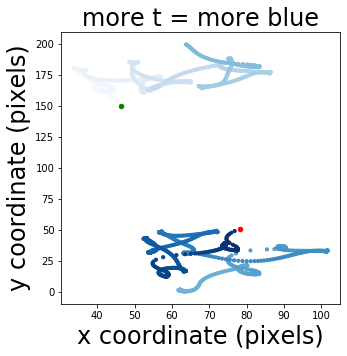

In [333]:
#plot the xy trajectory for longliving tips
width=200;height=200;saving = False;fontsize=24
# df_traj = d.copy()
col = "t"#'theta'
xmin=0; ymin=0; xmax=width; ymax=height; 
axis = [xmin,xmax,ymin,ymax]

fig, ax = plt.subplots(figsize=(5,5))
for pid in  pid_longest_lst:
    x_values ,y_values, c_values = df_traj[(df_traj.particle==pid)][['x','y', col]].values.T 
#     plt.scatter(xv,yv, s=5)#,#s=0.1)
    
    plt.scatter(x_values,y_values, s=10,#s=0.1
                c=c_values, vmin = np.min(c_values), vmax = np.max(c_values), cmap="Blues")
    plt.scatter([x_values[0]],[y_values[0]], s=20,color='green')
    plt.scatter([x_values[-1]],[y_values[-1]], s=20,color='red')
# plt.axis(axis)
plt.title(f'''more {col} = more blue''', fontsize=fontsize)
ax.set_xlabel('x coordinate (pixels)', fontsize=fontsize)
ax.set_ylabel('y coordinate (pixels)', fontsize=fontsize)
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_dir)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}.")

In [334]:
for pid in pid_longest_lst:
    d = df_traj[df_traj.particle==pid]
    df_traj[df_traj.particle==pid] = unwrap_traj_and_center(d);

saved figure in 
	ic_200x200.001.11_1_longest_tips.png.


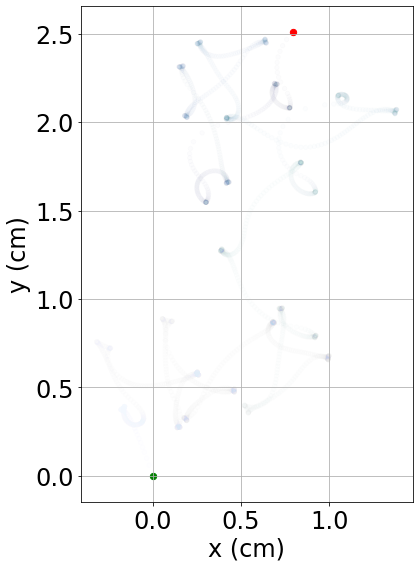

In [335]:
#plot the xy trajectory for longliving tips
width=200;height=200;saving = True;fontsize=24
savefig_dir = os.path.join(nb_dir,'Figures/msd')
savefig_fn = os.path.basename(input_file_name).replace('log.csv',f'{n_tips}_longest_tips.png')
# df_traj = d.copy()
col = "t"#'theta'
xmin=0; ymin=0; xmax=width; ymax=height; 
axis = [xmin,xmax,ymin,ymax]
DS = 5/200
fig, ax = plt.subplots(figsize=(8,8))
for pid in  pid_longest_lst:#[2:]:
    x_values ,y_values, c_values = df_traj[(df_traj.particle==pid)][['x','y', col]].values.T 
    #scale to real coords
    x_values *= DS
    y_values *= DS
    plt.scatter(x_values,y_values, s=20,#s=0.1
                c=c_values, vmin = np.min(c_values), vmax = np.max(c_values), cmap="Blues",alpha=0.01)
    plt.scatter([x_values[0]],[y_values[0]], s=40,color='green')
    plt.scatter([x_values[-1]],[y_values[-1]], s=40,color='red')
# plt.axis(axis)
# plt.title(f'''more time = more blue''', fontsize=fontsize)
#plt.title(f'''more {col} = more blue''', fontsize=fontsize)
ax.set_xlabel('x (cm)', fontsize=fontsize)
ax.set_ylabel('y (cm)', fontsize=fontsize)
# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.grid('on')
ax.set_aspect('equal')
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_dir)
    plt.savefig(savefig_fn, dpi=300)

    print(f"saved figure in \n\t{savefig_fn}.")

In [336]:
#save as csv
savedata_folder = os.path.dirname(input_file_name).replace('Log','msd')
if not os.path.exists(savedata_folder):
    os.mkdir(savedata_folder)
os.chdir(savedata_folder)
savedata_fn = os.path.basename(input_file_name).replace('.csv',f'_ntips_{n_tips}_msd.csv')
df_traj.to_csv(savedata_fn,index=False)

In [337]:
os.path.dirname

<function posixpath.dirname(p)>

In [338]:
savedata_folder

'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4_archive/msd'

In [339]:
beep(3)

0

# homerun! compute msds functionally for one trial for the n_tips longest tips

In [276]:
#confirmed.  There is approximately 1 duplicate for each spiral tip...  

#SCRUM FOR TONIGHT 12.17.2020
# DONE: remove all duplicate spiral tips
# DONE: save ^this prepared dataframe as .csv 
# DONE**SWITCH TO DARKMODE***
# DONE: put all ^that functionality in a .py file
# DONE: insert a cache that saves unduplicated trajectories to .csv in H/trajectories/
# TODO: generate a plot for the ensemble msd versus lag for a given input .csv
# TODO: compute n=1 .csv for each of the N=171 trials
# TODO: compute such a .csv for ^that n=1 .csv
# TODO: generate such a plot for ^that n = 1 .png
# TODO: see how any trends vary with n

In [9]:
# DONE: compute emsd with trackpy (
# DONE??:) *sanity check (optional way--> , and my own routine and check that they match)
input_file_name = "/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4_archive/Log/ic_200x200.001.11_log.csv"
output_file_name = preprocess_log(input_file_name)


In [5]:

#select the longest n trajectories
n_tips = 1#15
df = pd.read_csv(output_file_name)
s = df.groupby('particle').t.count()
s = s.sort_values(ascending=False)
pid_longest_lst = list(s.index.values[:n_tips])
# d = df[df.particle==pid_longest]
# print(pid_longest)
# print(s.head())
# pid_longest_lst = s.head(n_tips).values
df_traj = pd.concat([df[df.particle==pid] for pid in pid_longest_lst])
assert ( (np.array(sorted(set(df_traj['particle'].values)))==np.array(sorted(pid_longest_lst))).all())


In [14]:
emsd = trackpy.motion.emsd(df_traj, mpp=1., fps=1.,max_lagtime=40000)
# imsd = trackpy.motion.imsd(df_traj, mpp=1., fps=1.)

In [13]:
output_file_name_msd = output_file_name.replace("trajectories/","msd/").replace("traj_",f"emsd_ntips_{n_tips}")
emsd.to_csv(output_file_name_msd, index=False)

saved figure in 
	ic_200x200.001.11_emsd_ntips_1sr_400_mem_2.svg


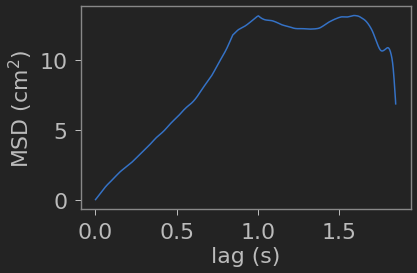

In [42]:
saving = True
savefig_fn = os.path.basename(output_file_name_msd).replace('.csv','.svg')
savefig_folder = os.path.join(nb_dir,'Figures/msd')
fontsize =22
figsize=(6,4)
DS = 5/200 #cm per pixel
DT = 1. #ms per frame
x_values = emsd.index.values*DT/10**3 #lag in seconds
y_values = emsd.values*DS**2 #msd

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x_values,y_values)
ax.set_xlabel('lag (s)', fontsize=fontsize)
ax.set_ylabel(r'MSD (cm$^2$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")

now... make msd for each trial!!! mwuhahaha

In [44]:
#TODO: make save_fn replace Log with trajectories because apparently it isn't
sr = 400
mem = 2
save_fn = input_file_name.replace('/Log','/trajectories').replace('log.csv', f'traj_sr_{sr}_mem_{mem}.csv')
print(save_fn)

/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4_archive/trajectories/ic_200x200.001.11_traj_sr_400_mem_2.csv


In [45]:
os.path.exists(save_fn)

True

In [46]:
# #TODO: accelerate preprocess_log using a pandas 1 liner
# #track tips for given input file
# output_file_name = generate_track_tips_pbc(input_file_name, save_fn=None)
# #load trajectories
# df = pd.read_csv(output_file_name)
# pid_lst = sorted(set(df.particle.values))
# #filter_duplicate_trajectory_indices is slow (and can probs be accelerated with a sexy pandas one liner)
# pid_lst_filtered = filter_duplicate_trajectory_indices(pid_lst,df)
# df = pd.concat([df[df.particle==pid] for pid in pid_lst_filtered])
# df.to_csv(output_file_name,index=False)

In [47]:
# DONE: turn off the slow part of the tracking

# TODO: try adding a filter to the longest trajectory on the basis of speed
- before computing which is longest? --> complicated
- after computing which is simplest? --> simple and extensible

In [48]:
df_traj

,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt,frame,particle
20906,1841.0,12,46.46108,150.30597,2.78050,2.06489,0.67394,3.13610,0.33789,0.39318,0.09534,0.86259,0.00049,-0.00732,-0.00108,1841,218
20907,1842.0,12,45.65619,152.68060,2.67952,2.01478,0.69792,4.22583,0.03095,0.40114,0.09237,0.86183,-0.00009,-0.00709,-0.00108,1842,218
20908,1843.0,12,45.08325,154.25487,NaN,1.91642,0.73303,5.69676,-0.37446,0.40693,0.08940,0.86123,-0.00063,-0.00686,-0.00108,1843,218
20909,1844.0,12,44.57639,155.62812,2.55740,1.94376,0.73117,8.04533,-1.02253,0.40228,0.09215,0.86175,-0.00021,-0.00707,-0.00108,1844,218
20910,1845.0,12,44.15069,156.72936,2.50126,1.88329,0.75221,12.03938,-2.11527,0.42248,0.08268,0.85975,-0.00239,-0.00635,-0.00107,1845,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22751,3686.0,6,74.83158,45.05953,1.96686,1.98705,-0.62357,16.57432,-24.86799,0.29260,0.09737,0.83577,0.00337,-0.00747,-0.00104,3686,218
22752,3687.0,6,75.26452,46.34132,2.62515,2.19242,-0.91649,-79.63756,131.95707,0.41193,0.10130,0.83645,-0.00044,-0.00777,-0.00105,3687,218
22753,3688.0,6,75.86199,47.60680,2.88991,2.45070,-1.30336,-10.55397,19.38342,0.36356,0.10078,0.83418,0.00118,-0.00773,-0.00104,3688,218
22754,3689.0,6,76.75585,48.99844,2.20967,2.87252,-1.93323,-4.46741,9.54202,0.43524,0.10254,0.83416,-0.00116,-0.00787,-0.00104,3689,218


In [60]:
x_values = df_traj.x.values
y_values = df_traj.y.values

jump_index_array, spd_lst = find_jumps(x_values,y_values,width=200,height=200, DS=5/200,DT=1, jump_thresh=4)

jump_index_array

array([ 845, 1055, 1056])

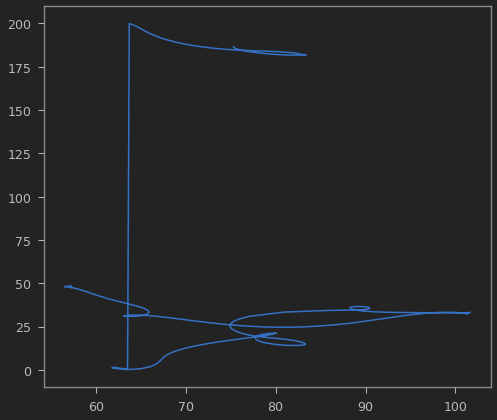

In [63]:
frm=1055
rng=300
plt.plot(x_values[frm-rng:frm+rng],y_values[frm-rng:frm+rng])
plt.show()

## validate MSD plots

# make some flower plots

In [69]:
input_file_name = search_for_file()

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.5_archive/trajectories_unwrapped/ic_200x200.001.13_traj_sr_400_mem_2.csv


In [124]:
n_tips = 50
df = pd.read_csv(input_file_name)
s = df.groupby('particle').t.count()
s = s.sort_values(ascending=False)
pid_longest_lst = list(s.index.values[:n_tips])
# d = df[df.particle==pid_longest]
# print(pid_longest)
# print(s.head())
# pid_longest_lst = s.head(n_tips).values
df_traj = pd.concat([df[df.particle==pid] for pid in pid_longest_lst])

saved figure in 
	ic_200x200.001.13_traj_sr_400_mem_2_ntips_50_longest_tips.png.


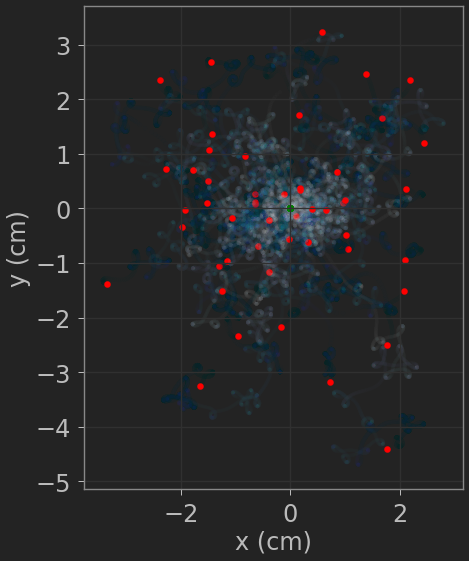

In [125]:
#plot the xy trajectory for longliving tips
width=200;height=200;saving = True;fontsize=24
V_thresh = eval(input_file_name[input_file_name.find('_V_')+len('_V_'):].split('_')[0])
savefig_dir = os.path.join(nb_dir,f'Figures/flower-plots/V_{V_thresh}')
savefig_fn = os.path.basename(input_file_name).replace('.csv',f'_ntips_{n_tips}_longest_tips.png')
# df_traj = d.copy()
col = "t"#'theta'
xmin=0; ymin=0; xmax=width; ymax=height; 
axis = [xmin,xmax,ymin,ymax]
DS = 5/200
fig, ax = plt.subplots(figsize=(8,8))
for pid in  pid_longest_lst:#[2:]:
    x_values ,y_values, c_values = df_traj[(df_traj.particle==pid)][['x','y', col]].values.T 
    jump_index_array, spd_lst = find_jumps(x_values,y_values,width=200,height=200, DS=5/200,DT=1, jump_thresh=10.)#.25)
    if len(jump_index_array)>0:
        ji = jump_index_array[0]
        x_values = x_values[:ji]
        y_values = y_values[:ji]
        c_values = c_values[:ji]
    
    #scale to real coords
    x_values *= DS
    y_values *= DS
    plt.scatter(x_values,y_values, s=20,#s=0.1
                c=c_values, vmin = np.min(c_values), vmax = np.max(c_values), cmap="Blues",alpha=.01)
    plt.scatter([x_values[0]],[y_values[0]], s=40,color='green')
    plt.scatter([x_values[-1]],[y_values[-1]], s=40,color='red')
# plt.axis(axis)
# plt.title(f'''more time = more blue''', fontsize=fontsize)
#plt.title(f'''more {col} = more blue''', fontsize=fontsize)
ax.set_xlabel('x (cm)', fontsize=fontsize)
ax.set_ylabel('y (cm)', fontsize=fontsize)
# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.grid('on')
ax.set_aspect('equal')
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_dir)
    plt.savefig(savefig_fn, dpi=300)

    print(f"saved figure in \n\t{savefig_fn}.")

## TODO: make a function that lops off msd if it jumps by more than a certain amount.
- don't do ^that before checking all files for funny jumps

In [112]:
jump_index_array, spd_lst = find_jumps(x_values,y_values,width=200,height=200, DS=5/200,DT=1, jump_thresh=.25)

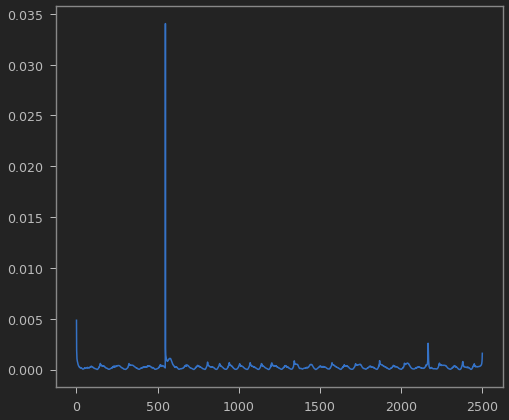

[548]


In [113]:
plt.plot(spd_lst)
plt.show()
print(jump_index_array)

In [127]:
def PlotFlowerTrajectories(input_file_name, n_tips=1,col="t",width=200,height=200,saving = True,fontsize=24,DS = 5/200, DT=1., jump_thresh=10., alpha=0.01):
    '''plot the xy trajectory for longliving tips'''
    V_thresh = eval(input_file_name[input_file_name.find('_V_')+len('_V_'):].split('_')[0])
    savefig_dir = os.path.join(nb_dir,f'Figures/flower-plots/V_{V_thresh}')
    savefig_fn = os.path.basename(input_file_name).replace('.csv',f'_ntips_{n_tips}_longest_tips.png')
    xmin=0; ymin=0; xmax=width; ymax=height; 
    axis = [xmin,xmax,ymin,ymax]
    fig, ax = plt.subplots(figsize=(8,8))
    for pid in  pid_longest_lst:#[2:]:
        x_values ,y_values, c_values = df_traj[(df_traj.particle==pid)][['x','y', col]].values.T 
        jump_index_array, spd_lst = find_jumps(x_values,y_values,width=width,height=height, DS=DS,DT=DT, jump_thresh=jump_thresh)#.25)
        if len(jump_index_array)>0:
            ji = jump_index_array[0]
            x_values = x_values[:ji]
            y_values = y_values[:ji]
            c_values = c_values[:ji]

        #scale to real coords
        x_values *= DS
        y_values *= DS
        plt.scatter(x_values,y_values, s=20,#s=0.1
                    c=c_values, vmin = np.min(c_values), vmax = np.max(c_values), cmap="Blues",alpha=alpha)
        plt.scatter([x_values[0]],[y_values[0]], s=40,color='green')
        plt.scatter([x_values[-1]],[y_values[-1]], s=40,color='red')
    # plt.axis(axis)
    # plt.title(f'''more time = more blue''', fontsize=fontsize)
    #plt.title(f'''more {col} = more blue''', fontsize=fontsize)
    ax.set_xlabel('x (cm)', fontsize=fontsize)
    ax.set_ylabel('y (cm)', fontsize=fontsize)
    # We change the fontsize of minor ticks label 
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=0)
    ax.grid('on')
    ax.set_aspect('equal')
    if not saving: 
        plt.show() 
    else:
        plt.tight_layout()
        os.chdir(savefig_dir)
        plt.savefig(savefig_fn, dpi=300)
        plt.close()
        print(f"saved figure in \n\t{savefig_fn}.")
    return savefig_fn

# TODO: debug the msd output of the primary analysis pipeline
- TODO: identify the part that's broken
- TODO: tunnel into that part

In [4]:
from lib.routines.compute_trajectories import *
from lib.routines.dag_log_to_msd import *
from lib.routines.compute_msd import *

In [5]:
from lib.my_initialization import *
from lib import *
from lib.my_initialization import *
from lib.utils.utils_traj import *
from lib.utils.operari import *

import trackpy, pandas as pd, numpy as np
from lib import *
from lib.routines.track_tips import *
from lib.utils.dist_func import *
from lib.utils.utils_traj import *

from lib.routines.compute_trajectories import *
from lib.routines.dag_log_to_msd import *
from lib.routines.compute_msd import *

In [7]:
# search_for_file()

File: /Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv


'/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'

In [20]:
# #(good): data that uses explicit particle tracking
# input_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'
# pid_col='pid_explicit'
# #(bad)particle data analyzed using full model pipeline
# # input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv"
# df=pd.read_csv(input_fn)

# kwargs={}
# width=10
# ds=10
# height=width
# DS=ds/width

# #unwrap trajectories
# pid_lst = sorted(set(df[pid_col].values))
# #(duplicates filtered earlier in full model pipeline.  Unnecessary in particle model with explicit tracking_ _  _ _ ) filter_duplicate_trajectory_indices is slow (and can probs be accelerated with a sexy pandas one liner)
# # pid_lst_filtered = filter_duplicate_trajectory_indices(pid_lst,df)
# df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, DS, **kwargs) for pid in pid_lst_filtered])
# DT=get_DT(df,pid_col=pid_col) #ms
# df.head()

,frame,t,n,x,y,pid_explicit
0,1,0.00,16,0.000000,0.000000,0
16,2,0.25,16,-0.040104,0.009229,0
32,3,0.50,16,-0.006310,0.087671,0
48,4,0.75,16,0.000519,0.023270,0
64,5,1.00,16,-0.063225,0.062974,0


In [ ]:
# #TODO: compute imsd for these values
# #compute ensemble mean squared displacement
# emsd = trackpy.motion.emsd(df_traj, mpp=1., fps=1.,max_lagtime=40000)
# #cast ensemble mean squared displacement into units of cm^2 and seconds
# return pd.DataFrame({'msd':DS**2*emsd.values, 'lagt':emsd.index.values*DT/10**3, 'src':os.path.basename(input_file_name)})

In [22]:
# #TODO: find the broken part of the routine 

# # workflow_reduce_logs_to_diffcoeff_summary
# #TODO: show whether unwrapped trajectories make sense
# # run_routine_unwrapped_trajectories_to_diffcoeff_summary
# generate_msd_figures_routine_for_list


# #DONE: checked outputs emsd_fn makes sense
# #TODO: add bootstrapping 95%CI for a tighter looking std dev of msd values
# #TODO: check the units of msd makes sense
# compute_emsd_for_longest_trajectories

# #If none of ^that is broken, then the problem may be in 
# # dag_a_postprocess

In [13]:
# ds=10
# width=10
# n_tips=1
# L=width
# DS=ds/width
# DT = np.mean(df.t.diff().dropna().values)
# retval=compute_emsd_for_longest_trajectories(input_file_name=input_fn, n_tips=n_tips,DS=DS,DT=DT,L=L)

In [21]:
# #(later)isolate the xyt_values for a given particle
# pid=0
# t1=df1
# dff=df[(df[pid_col]==pid)]
# xyt_values=dff[['x','y','t']].values
# xyt_values.shape

# # Input units are pixels and frames. Output units are microns and seconds.
# df_out=trackpy.motion.msd(
#     traj,
#     mpp,
#     fps,
#     max_lagtime=100,
#     detail=False
# )
# #in this form???
# # pd.DataFrame({'msd':DS**2*emsd.values, 'lagt':emsd.index.values*DT/10**3, 'src':os.path.basename(input_file_name)})

(12001, 3)

In [32]:
# sorted(set(retval.src.values))

# x_values=retval.lagt.values
# y_values=retval.msd.values

# plt.plot(x_values,y_values)
# plt.show()

# emsd_fn=search_for_file()
# df=pd.read_csv(emsd_fn)
# df.head()

# DT=0.25 #ms between two frames
# # DT=df.t.head(2).diff().dropna().values[0]
# DT

# #TODO: load the cached emsd file
# #TODO: see if the aggregated df goes to the average and stddev correctly
# t_values, msd_values, std_values = compute_average_std_msd(df,DT)

['pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv']

In [3]:
# x_values=t_values
# y_values=msd_values
# y_err_values=1.96*std_values

# plt.plot(x_values,y_values)
# plt.fill_between(x_values,y_values-y_err_values,y_values+y_err_values,alpha=0.4)
# plt.show()

In [34]:
#TODO: add bootstrapping 95%CI to replace
# t_values, msd_values, std_values = compute_average_std_msd(df,DT)

In [42]:
# #TODO(later): debug plotting if it still isn't working
# savefig_fn = os.path.basename(output_file_name).replace('.csv','_short_time_std.png')
# retval = PlotMSD(df, t_values, msd_values, std_values, savefig_folder,savefig_fn,xlim = [0,0.2],ylim=[0,1],saving = True,fontsize =22,figsize=(9,6),D=3.5)
input_file_name=input_fn
folder_name=os.path.dirname(input_file_name)
dirname = os.path.dirname(input_file_name).split('/')[-1]
save_folder = folder_name.replace(dirname,'msd')

In [50]:
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
trial_folder_name=os.path.basename(os.path.dirname(os.path.dirname(input_fn)))
trial_folder_name

'euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0'

In [52]:
use_cache=False
#TODO: follow emsd_fn in the outer pipeline to the summary 
#compute the diffusion coefficient summary
os.chdir(os.path.dirname(emsd_fn))
dir_out=os.path.join(save_folder,"diffcoeff_summary_"+os.path.basename(emsd_fn))
if not use_cache or not os.path.exists(dir_out):
    dir_out = dag_a_postprocess(emsd_fn=emsd_fn,
                            trial_folder_name=trial_folder_name,
                            dir_out=dir_out)#,**kwargs)

generating diffcoeff_figures for euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0
	num. trials that didn't show a tip lasing longer than 150ms is 0, and that didn't show am Rsquared of at least 0.0 is 0
saved diffcoeff_summary to /Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/msd
the total number of trials considered in summary is 0


### dag_a_postprocess is broken
### compute_diffusion_coeffs is giving lame output

In [55]:
# dag_a_postprocess
kwargs={}
fn2= compute_diffusion_coeffs(input_file_name=emsd_fn,**kwargs)
retval= generate_diffcoeff_figures(input_file_name=os.path.abspath(fn2),trial_folder_name,dir_out=dir_out,**kwargs)


generating diffcoeff_figures for euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0
	num. trials that didn't show a tip lasing longer than 150ms is 0, and that didn't show am Rsquared of at least 0.0 is 0
saved diffcoeff_summary to /Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/msd
the total number of trials considered in summary is 0


In [58]:
os.path.exists(fn2)
df=pd.read_csv(fn2)
df.head()

,Unnamed: 0,src,N,D_expval,D_stderr,duration_of_traj,intercept,Rsquared,p_value
0,0,pbc_particle_log100_traj_sr_30_mem_0_unwrap.csv,40000,-9999.0,-9999.0,0.138409,-9999.0,99980001.0,-9999.0
1,1,pbc_particle_log101_traj_sr_30_mem_0_unwrap.csv,40000,-9999.0,-9999.0,0.138409,-9999.0,99980001.0,-9999.0
2,2,pbc_particle_log102_traj_sr_30_mem_0_unwrap.csv,40000,-9999.0,-9999.0,0.138409,-9999.0,99980001.0,-9999.0
3,3,pbc_particle_log103_traj_sr_30_mem_0_unwrap.csv,40000,-9999.0,-9999.0,0.138409,-9999.0,99980001.0,-9999.0
4,4,pbc_particle_log104_traj_sr_30_mem_0_unwrap.csv,40000,-9999.0,-9999.0,0.138409,-9999.0,99980001.0,-9999.0


In [72]:
#NOTE: tau_min and tau_max is not causing the bug

input_file_name=emsd_fn
tau_min=0#.15
tau_max=0.5

# compute_diffusion_coeffs
df=pd.read_csv(input_file_name)

#initialize output dataframe by counting the number of trials that apppear in each tip log, listed in src
ef=df.groupby('src').src.count()
sv=ef.index;nv=ef.values
df2=pd.DataFrame({'src':sv,'N':nv})

# select msd data for single trial
src_lst=list(set(df.src.values))

# for src in src_lst:   #UNCOMMENT_HERE
for src in src_lst[:2]: #COMMENT_HERE
    
    
    # src=src_lst[0]
    tau_values,msd_values=df[df.src==src][['lagt','msd']].values.T

    boo=(tau_values>=tau_min)&(tau_values<=tau_max)
    x_values=tau_values[boo]
    y_values=msd_values[boo]
    duration_of_traj=tau_values[-1]

    if x_values.shape[0]>0:
        #compute diffusion coefficient
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
        #    std_err: D_stderr : Standard error of the estimated gradient.
        #    slope  : D_expval : diffcoef of msd curve
        D_expval=slope
        D_stderr=std_err
        #     retval=src,duration_of_traj,D_expval,D_stderr,intercept,r_value,p_value
    else:
        #no value was found
        D_expval=-9999.;D_stderr=-9999.;intercept=-9999.;r_value=-9999.;p_value=-9999.

    #update output dataframe with diffusion coefficient measurements
    df2.loc[df2.src==src,'D_expval']=D_expval#df2.loc[df2.src==src,
    df2.loc[df2.src==src,'D_stderr']=D_stderr#df2.loc[df2.src==src,
    df2.loc[df2.src==src,'duration_of_traj']=duration_of_traj#df2.loc[df2.src==src,
    df2.loc[df2.src==src,'intercept']=intercept#df2.loc[df2.src==src,
    df2.loc[df2.src==src,'Rsquared']=r_value**2#df2.loc[df2.src==src,
    df2.loc[df2.src==src,'p_value']=p_value#df2.loc[df2.src==src,


#save results to csv
os.chdir(os.path.dirname(input_file_name))
savefn=("diffcoeff_"+os.path.basename(input_file_name)).replace('.csv',f'_Tmin_{tau_min}_Tmax_{tau_max}.csv')
df2.to_csv(savefn)

In [74]:
print ((np.min(tau_values),np.max(tau_values)))
df2.head()


(3.4602301098535286e-06, 0.13840920439414114)


,src,N,D_expval,D_stderr,duration_of_traj,intercept,Rsquared,p_value
0,pbc_particle_log100_traj_sr_30_mem_0_unwrap.csv,40000,NaN,NaN,NaN,NaN,NaN,NaN
1,pbc_particle_log101_traj_sr_30_mem_0_unwrap.csv,40000,NaN,NaN,NaN,NaN,NaN,NaN
2,pbc_particle_log102_traj_sr_30_mem_0_unwrap.csv,40000,NaN,NaN,NaN,NaN,NaN,NaN
3,pbc_particle_log103_traj_sr_30_mem_0_unwrap.csv,40000,NaN,NaN,NaN,NaN,NaN,NaN
4,pbc_particle_log104_traj_sr_30_mem_0_unwrap.csv,40000,NaN,NaN,NaN,NaN,NaN,NaN


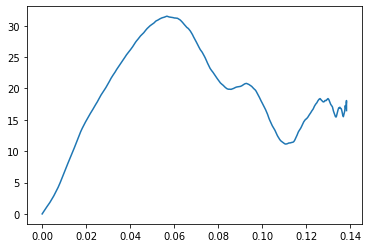

In [71]:
x_values=tau_values
y_values=msd_values

plt.plot(x_values,y_values)
plt.show()

In [75]:
#TODO: copy the aggregation routine used to generate the fits for the dRdt versus R
#TODO: change emsd routine to 
#TODO: change ^that routine to take a folder of emsd files as input

In [222]:
#Root Cause: a scaling problem could be causing tau_min/tau_max to be missing the sparsly sampled trajectories
#DONT DO THIS ONE(option A), lower quality, perhaps quick fix of setting tau_min and tau_max to input determined values... but that ignores a root cause, which probably involves a scaling problem
#DO THIS ONE(option B, higher quality results with boostrapping)
#TODO: get a folder of unwrapped trajectory file names
#TODO: print summary stats on particle lifetimes for one input folder
#TODO: print make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by
#TODO: for each unwrapped trajectory file, compute imsd for each particle lasting longer than minimum_lifetime. save each as csv
#TODO: load all of ^those imsd into python and compute the mean imsd, binning by lagt
#TODO: save resulting emsd to csv
#TODO: generate plots
#TODO: look at plots and decide whether to change the default tau_min and tau_max
#TODO: compute linear regression with tau_min and tau_max

def get_log_files(trial_folder_name, extension='/Log/', trgt='.csv'):
    '''TODO: move this function to utils
    
    #Example Usage:
    input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories/pbc_particle_log144_traj_sr_30_mem_0.csv"
    trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
    input_fn_lst=get_unwrapped_Log_files(trial_folder_name)

    '''
    os.chdir(trial_folder_name+extension)
    input_fn_lst=[os.path.abspath(fn) for fn in os.listdir() if fn[-4:]==trgt]
    return input_fn_lst

def get_trajectory_files(trial_folder_name,trgt='.csv', extension='/trajectories/'):
    '''TODO: move this function to utils'''
    os.chdir(trial_folder_name+extension)
    input_fn_lst=[os.path.abspath(fn) for fn in os.listdir() if fn[-4:]==trgt]
    return input_fn_lst

def get_unwrapped_trajectory_files(trial_folder_name, extension='/trajectories_unwrap/',trgt='.csv'):
    '''TODO: move this function to utils'''
    os.chdir(trial_folder_name+extension)
    input_fn_lst=[os.path.abspath(fn) for fn in os.listdir() if fn[-4:]==trgt]
    return input_fn_lst

In [106]:
extension='/trajectories_unwrap/'
os.chdir(trial_folder_name+extension)
fn=os.listdir()[0]
os.path.exists(fn)

True

In [141]:
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of annihilation events was {time.time()-start:.2f} seconds.")
beep(3)


NameError: name 'input_fn_lst' is not defined

In [142]:
#TODO: get a folder of unwrapped trajectory file names
trgt='.csv'
#Example Usage:
input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories/pbc_particle_log144_traj_sr_30_mem_0.csv"
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
input_fn_lst=get_unwrapped_trajectory_files(trial_folder_name)

# input_fn_lst=[os.path.abspath(fn) for fn in os.listdir(trial_folder_name+'/trajectories_unwrap/') if fn[-4:]==trgt]
print(f"computing mean squared for {len(input_fn_lst)} unwrapped trajectory .csv files...")
print(f"looking at a token example input from {input_fn_lst[0]}")

df=pd.read_csv(input_fn_lst[0])
df.head()
def get_DT(df,t_col='t',pid_col='particle'):
    DT=np.mean(df[df[pid_col]==0][t_col].diff().dropna().values)
    return DT
DT=get_DT(df) #ms

computing mean squared for 200 unwrapped trajectory .csv files...
looking at a token example input from /Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log3_traj_sr_30_mem_0_unwrap.csv


# start test data
- TODO: wrap routine up to bootstrapping
- TODO(later?): consider parallelizing bootstrapping?
- TODO: 

## dev fast msd

In [4]:
#input_fn is any sort of trajectory .csv file.  it must have a column reffered to by pid_col that uniquely identifies each particle
#Load example particle Log file where I want to compute MSD and tracking has already been done 
#(good): data that uses explicit particle tracking
input_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
pid_col='pid_explicit'
t_col='t'
#(bad)particle data analyzed using full model pipeline
# input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv"
df=pd.read_csv(input_fn)
kwargs={}
width=10 #width of computational domain
ds   =5  #cm
#from here on, we will use units in terms of those used by the full model
height=width
DS=ds/width

#unwrap trajectories
pid_lst = sorted(set(df[pid_col].values))
#(duplicates filtered earlier in full model pipeline.  Unnecessary in particle model with explicit tracking_ _  _ _ ) filter_duplicate_trajectory_indices is slow (and can probs be accelerated with a sexy pandas one liner)
# pid_lst_filtered = filter_duplicate_trajectory_indices(pid_lst,df)
df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, DS, **kwargs) for pid in pid_lst])
DT=get_DT(df,pid_col=pid_col) #ms
df.head()

FileNotFoundError: [Errno 2] File /Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv does not exist: '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'

In [3]:
df[df.frame==2].describe()

,frame,t,n,x,y,pid_explicit
count,16.0,16.00,16.0,16.000000,16.000000,16.000000
mean,2.0,0.25,16.0,0.002237,-0.002213,7.500000
std,0.0,0.00,0.0,0.033202,0.036687,4.760952
min,2.0,0.25,16.0,-0.044786,-0.084995,0.000000
25%,2.0,0.25,16.0,-0.027915,-0.022203,3.750000
50%,2.0,0.25,16.0,-0.001693,0.003719,7.500000
75%,2.0,0.25,16.0,0.030018,0.019456,11.250000
max,2.0,0.25,16.0,0.050437,0.055976,15.000000


In [4]:
#back of envelop estimate
2*.03**2*DS**2/DT

0.0018

In [9]:
#print summary stats on particle lifetimes for one input folder
dft=df.groupby(pid_col)[t_col].describe()
df_lifetimes=-dft[['max','min']].T.diff().loc['min']

print(f"printing summary stats on particle lifetimes for one input folder in {trial_folder_name}:")
print(df_lifetimes.describe())
# print(df_lifetimes.head(10))
print("\nPlease make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by")

printing summary stats on particle lifetimes for one input folder in /Users/timothytyree/Documents/GitHub/care/notebooks/Data:
count      16.0
mean     3000.0
std         0.0
min      3000.0
25%      3000.0
50%      3000.0
75%      3000.0
max      3000.0
Name: min, dtype: float64

Please make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by


In [10]:
minimum_lifetime=500. #ms
crop_start_by=0
crop_end_by=0

In [11]:
width=10
ds   =5  #cm
pid_col='pid_explicit'
t_col='t'

kwargs={
    'DT':DT,
    'ds':ds,
    'width':width,
    'minimum_lifetime':minimum_lifetime,
    'crop_start_by':crop_start_by,
    'crop_end_by':crop_end_by,
    'pid_col':pid_col,
    't_col':t_col,
    'max_lagtime':None
}

In [14]:
use_test=True
if use_test:
    #optionally test the routine
    df_msd=compute_each_mean_squared_displacement(input_fn,**kwargs)
#     routine_compute_imsd(input_fn,**kwargs)

In [15]:
def routine(input_fn):
    return routine_compute_imsd(input_fn,**kwargs)


In [16]:
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
# input_fn_lst=get_log_files(trial_folder_name, extension='/Log/', trgt='.csv')
input_fn_lst=get_log_files(trial_folder_name, extension='', trgt='.csv')
print(f"We're about to obliterate {len(input_fn_lst)} trajectory files from {trial_folder_name}...")

We're about to obliterate 1 trajectory files from /Users/timothytyree/Documents/GitHub/care/notebooks/Data...


In [17]:
#extract values
df_out=compute_each_mean_squared_displacement(input_fn,**kwargs)
df_in=df_out
lagt_values=df_in['lagt'].values
msd_values=df_in['msd'].values

In [18]:
#bin and bootstrap results
bins='auto'#50#
dict_out=bin_and_bootstrap_xy_values(x=lagt_values,y=msd_values,xlabel='lagt',ylabel=r'msd',bins=bins,min_numobs=None,num_bootstrap_samples=1000)
df_emsd=pd.DataFrame(dict_out)
df_emsd.head()

,lagt,msd,Delta_lagt,Delta_msd,p_lagt,p_msd,counts
0,26.00,0.051178,0.511760,0.001006,0.933783,0.625983,3312
1,77.75,0.151440,0.486682,0.001069,0.641911,0.397815,3312
2,129.50,0.250366,0.509670,0.001514,0.815254,0.602810,3312
3,181.25,0.349894,0.488614,0.002085,0.002968,0.954943,3312
4,233.00,0.454443,0.516458,0.002974,0.669735,0.896575,3312


In [19]:
# #TODO(later): make text interface for choosing new max_lagtime. Note max_lagtime is in units of frames, not time...
# print(f"If you want to save memory and decrease runtime decide on a reasonable value for max_lagtime!  maxt={max_lagtime}")

#TODO: load all of ^those imsd into python and compute the mean imsd, binning by lagt
#TODO: save resulting emsd to csv
#TODO: generate plots
#TODO: look at plots and decide whether to change the default tau_min and tau_max
#TODO: compute linear regression with tau_min and tau_max

In [20]:
#compute the linear fit of bootstrapped msd
df=df_emsd
xmin=0. #ms
xmax=500 #ms

x_values=df['lagt'].values
y_values=df['msd'].values
x_err_values=df['Delta_lagt'].values
y_err_values=df['Delta_msd'].values
counts=df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(x_values>xmin)&(x_values<xmax)
x=x_values[boo]
y=y_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']*x_values

#(optional) rename specific values
dict_force_fit=dict_force_fit
y_hat_values=y_hat_values

#bluf
print(f"the ols fit for particle model:")
print_dict(dict_force_fit)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"trial_folder_name: {trial_folder_name}")

the ols fit for particle model:
m=0.002085242608139578
Delta_m=4.3300602109248706e-05
b=-0.017242820634599587
Delta_b=0.012923231478108333
Rsquared=0.9991028548074199
Nobs= 3310 +- 5
trial_folder_name: /Users/timothytyree/Documents/GitHub/care/notebooks/Data


In [21]:
from lib import *
from lib.viewer.PlotMeanSquaredDisplacements import PlotMeanSquaredDisplacements

df=pd.read_csv(input_fn)
#compute t0 and tf for each particle
dft=df.groupby(pid_col)[t_col].describe()
dft0=dft['min']
dftf=dft['max']

#compute t1 and t2 for each particle
dft1=dft0+crop_start_by
dft2=dftf-crop_end_by

#get the list of particles dft2-dft1 \ge minimum_lifetime
dflifetime_considered=dft2-dft1
pid_values_to_consider=dflifetime_considered[dflifetime_considered>=minimum_lifetime].index.values

array([  26.   ,   77.75 ,  129.5  ,  181.25 ,  233.   ,  284.75 ,
        336.5  ,  388.25 ,  439.875,  491.5  ,  543.25 ,  595.   ,
        646.75 ,  698.5  ,  750.25 ,  802.   ,  853.625,  905.25 ,
        957.   , 1008.75 , 1060.5  , 1112.25 , 1164.   , 1215.75 ,
       1267.375, 1319.   , 1370.75 , 1422.5  , 1474.25 , 1526.   ,
       1577.75 , 1629.5  , 1681.25 , 1732.875, 1784.5  , 1836.25 ,
       1888.   , 1939.75 , 1991.5  , 2043.25 , 2095.   , 2146.625,
       2198.25 , 2250.   , 2301.75 , 2353.5  , 2405.25 , 2457.   ,
       2508.75 , 2560.375, 2612.   , 2663.75 , 2715.5  , 2767.25 ,
       2819.   , 2870.75 , 2922.5  , 2974.125])

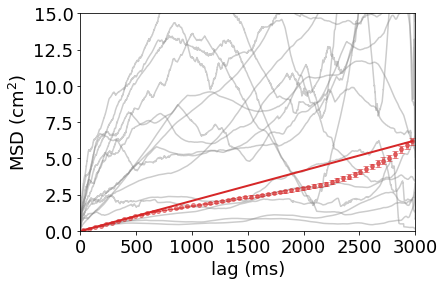

In [33]:
ylim=15
#plot mean radial velocities
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))
for pid in pid_values_to_consider[:]:
    lagt_values,msd_values=compute_individual_mean_squared_displacement(df,dft1,dft2,DT,pid,pid_col=pid_col)
    ax.plot(lagt_values,msd_values*DS**2,alpha=0.4,color='gray')
    
#PlotMeanSquaredDisplacements     
PlotMeanSquaredDisplacements(ax, x_values, y_values, y_err_values, y_hat_values,c='C3')
# PlotMeanSquaredDisplacements(ax, x_values2, y_values2, y_err_values2, y_hat_values2,c='C4')
ax.set_ylim([0,ylim])
# plt.tight_layout()
# plt.show()
plt.xlim([0,3000])
plt.ylim([0,ylim])
plt.show()

In [255]:
# def compute_individual_mean_squared_displacement(df,dft1,dft2,DT,pid,pid_col='particle',max_lagtime=None,**kwargs):
#     '''
#     Example Usage:
#     lagt_values,msd_values=compute_individual_mean_squared_displacement(df,dft1,dft2,DT,pid,pid_col='pid_explicit')
#     '''
#     fps = 1./DT #output time units is in same time units as inputs

#     #extract the trajectory as a DataFrame instance
#     t1=dft1[dft1.index==pid].values[0]
#     t2=dft2[dft2.index==pid].values[0]
#     # print(f"computing msd for particle {pid} from times {t1} to {t2} ms...")

#     #extract the trajectory as a DataFrame instance
#     boo = df[pid_col]==pid
#     boo&= df[t_col]>=t1
#     boo&= df[t_col]<=t2
#     dff=df[boo]

#     if max_lagtime is None:
#         max_lagtime=dff.index.values.shape[0]

#     # Input units are pixels and frames. Output units are microns and seconds.
#     df_out=trackpy.motion.msd(
#         traj=dff,
#         mpp=1.,#does nothing
#         fps=fps,
#         max_lagtime=max_lagtime,
#         detail=False
#     )
#     lagt_values,msd_values=df_out[['lagt','msd']].values.T
#     return lagt_values,msd_values

In [168]:
# def compute_each_mean_squared_displacement(input_fn,DT,ds,width,
#                          minimum_lifetime,crop_start_by,crop_end_by,
#                          pid_col,t_col,max_lagtime=None,
#                          **kwargs):
#     '''
#     computes the mean squared displacements for each trajectory listed in input_fn
#     input_fn gives the location of a trajectory file with columns x,y,frames, and some pid_col.
#     trajectory that may have periodic periodic boundary conditions on a square domain.
#     '''
#     df=pd.read_csv(input_fn)
#     height=width
#     DS=ds/width

#     #unwrap trajectories
#     pid_lst = sorted(set(df[pid_col].values))
#     #(duplicates filtered earlier in full model pipeline.  Unnecessary in particle model with explicit tracking... filter_duplicate_trajectory_indices is slow (and can probably be accelerated with a sexy pandas one liner)
#     # pid_lst = filter_duplicate_trajectory_indices(pid_lst,df)
#     df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, DS, **kwargs) for pid in pid_lst_filtered])

#     #compute t0 and tf for each particle
#     dft=df.groupby(pid_col)[t_col].describe()
#     dft0=dft['min']
#     dftf=dft['max']

#     #compute t1 and t2 for each particle
#     dft1=dft0+crop_start_by
#     dft2=dftf-crop_end_by

#     #get the list of particles dft2-dft1 \ge minimum_lifetime
#     dflifetime_considered=dft2-dft1
#     pid_values_to_consider=dflifetime_considered[dflifetime_considered>=minimum_lifetime].index.values

#     #compute number of num_individuals
#     pid_lst=sorted(set(df[pid_col].values))
#     num_individuals=len(pid_lst)
#     # print(f'Computing msd values for {num_individuals} particles...')

#     #how long does it take 1 core to compute the msd's for every particle in this trial?
#     lagt_out_lst=[];msd_out_lst=[];pid_out_lst=[]
#     for pid in pid_lst:
#         #compute output
#         lagt_values,msd_values=compute_individual_mean_squared_displacement(df,dft1,dft2,DT,pid,pid_col='pid_explicit')    
#         pid_values=np.zeros_like(msd_values,dtype='int')
#         #record output
#         pid_out_lst.extend(pid_values)       #indices that identify the particles
#         lagt_out_lst.extend(lagt_values)     #ms
#         msd_out_lst.extend(DS**2*msd_values) #units of ds

#     df_out=pd.DataFrame({'pid':pid_out_lst,'lagt':lagt_out_lst,'msd':msd_out_lst})
#     return df_out

# def routine_compute_imsd(input_fn,save_folder=None,**kwargs):
#     #compute results
#     df_msd=compute_each_mean_squared_displacement(input_fn,**kwargs)
#     #save results
#     dirname = os.path.dirname(input_fn).split('/')[-1]
#     folder_name=os.path.dirname(input_fn)
#     if save_folder is None:
#         save_folder = folder_name.replace(dirname,'msd')
#     if not os.path.exists(save_folder):
#         os.mkdir(save_folder)
#     os.chdir(save_folder)
#     output_fn=input_fn.replace('.csv','_emsd.csv')
#     df_msd.to_csv(output_fn, index=False)
#     return os.path.abspath(output_fn)

In [144]:
# def PlotMeanSquaredDisplacements(ax,
#                              x_values,
#                              y_values,
#                              y_err_values,
#                              y_hat_values,
#                              alpha=0.5,
#                              c='C3',
#                              fontsize=18,
#                              elinewidth=3,
#                              markersize=4,
#                              capsize=3,
#                              xlim=[0, 0.5],
#                              ylim=[0, 500],
#                              **kwargs):

#     x_label=r'lag (ms)'
#     y_label=r'MSD (cm$^{2}$)'

#     # ax.scatter(x_values,y_values,c=c,s=20,alpha=alpha)
#     #plot error bars
#     ax.errorbar(x=x_values,
#                 y=y_values,
#                 yerr=y_err_values,
#                 c=c,
#                 alpha=alpha,
#                 fmt='o',
#                 markersize=markersize,
#                 ecolor=c,
#                 elinewidth=elinewidth,
#                 errorevery=1,
#                 capsize=capsize)
#     #plot fits
#     ax.plot(x_values, y_hat_values, c=c, lw=2, alpha=1, linestyle='solid')

#     #format plot
#     ax.set_xlim(xlim)
#     ax.set_ylim(ylim)
#     ax.set_xlabel(x1_label, fontsize=fontsize)
#     ax.set_ylabel(y_label, fontsize=fontsize)
#     ax.tick_params(axis='both', which='major', labelsize=fontsize)
#     ax.tick_params(axis='both', which='minor', labelsize=1)
#     return True

## dev bootstrap parallelization

In [ ]:
#     R_values=x
#     dRdt_values=y
#     num_samples=num_bootstrap_samples
#     #implement measure of dRdt that explicitely bins by radius
#     counts,r_edges=np.histogram(R_values,bins=bins)
#     range_values=r_edges
#     if min_numobs is None:
#         min_numobs=np.mean(counts)/8

#     r_lst=[];drdt_lst=[];Delta_r_lst=[];Delta_drdt_lst=[];
#     count_lst=[];p_r_lst=[];p_drdt_lst=[]
#     if npartitions==1:
#         for j in range(r_edges.shape[0]-1):
#             numobs=counts[j]
#             if numobs>min_numobs:
#                 boo=(R_values>=r_edges[j])&(R_values<r_edges[j+1])
#                 r_values=R_values[boo]
#                 drdt_values=dRdt_values[boo]
#                 #compute mean values in bin
#                 r=np.mean(r_values)
#                 drdt=np.mean(drdt_values)
#                 # compute 95% CI for mean
#                 Delta_r,p_r=bootstrap_95CI_Delta_mean(r_values,
#                                                      num_samples=num_samples)
#                 Delta_drdt,p_drdt=bootstrap_95CI_Delta_mean(drdt_values,
#                                                      num_samples=num_samples)
#                 #append results to list
#                 r_lst.append(r)
#                 drdt_lst.append(drdt)
#                 Delta_r_lst.append(Delta_r)
#                 Delta_drdt_lst.append(Delta_drdt)
#                 p_r_lst.append(p_r)
#                 p_drdt_lst.append(p_drdt)
#                 count_lst.append(numobs)
#     else:
#         raise "Warning: npartitions>1 not yet implemented!"

In [73]:
#baked input: x=R_values, x_edges=r_edges, y=dRdt_values
#input: bin_id
#output: np.array of values for 1 bootstrapped output

# def get_routine_bootstrap_bin(x_values,y_values,x_bin_edges,num_samples=100,min_numobs=100,**kwargs):
#     '''x_values,y_values,x_bin_edges are 1 dimensional numpy arrays.
#     returns the function, routine_bootstrap_bin.'''
#     R_values=x_values
#     dRdt_values=y_values
#     r_edges=x_bin_edges
#     def routine_bootstrap_bin(bin_id):
#         j=bin_id
#         numobs=counts[j]
#         if numobs>min_numobs:
#             boo=(R_values>=r_edges[j])&(R_values<r_edges[j+1])
#             r_values=R_values[boo]
#             drdt_values=dRdt_values[boo]
#             #compute mean values in bin
#             r=np.mean(r_values)
#             drdt=np.mean(drdt_values)
#             # compute 95% CI for mean
#             Delta_r,p_r=bootstrap_95CI_Delta_mean(r_values,
#                                                  num_samples=num_samples)
#             Delta_drdt,p_drdt=bootstrap_95CI_Delta_mean(drdt_values,
#                                                  num_samples=num_samples)
#             return np.array((r,drdt,Delta_r,Delta_drdt,p_r,p_drdt,numobs))
#     return routine_bootstrap_bin


In [70]:
from lib.measure.bootstrap import bin_and_bootstrap_xy_values
import dask.bag as db
num_bootstrap_samples=100
bins='auto'
min_numobs=None
file_in='/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/drdt.csv'
npartitions=os.cpu_count()
#load an enormous number of samples into a pandas.DataFrame
df_in=pd.read_csv(file_in)
#extract values
xlabel='r'
ylabel='drdt'
x_values=df_in[xlabel].values
y_values=df_in[ylabel].values


# def bin_and_bootstrap_xy_values_parallel(x,
#                                y,
#                                xlabel,
#                                ylabel,
#                                bins=bins,
#                                min_numobs=None,
#                                num_bootstrap_samples=1000,
#                                npartitions=1,
#                                use_test=True,
#                                 test_val=0,printing=True):
#     num_samples=num_bootstrap_samples
#     counts,x_bin_edges=np.histogram(x_values,bins=bins)
#     bin_id_lst=list(range(x_bin_edges.shape[0]-1))
#     if min_numobs is None:
#         min_numobs=np.mean(counts)/8

#     #bake method to bootstrap 95%CI of mean of y conditioned on x being within a given bin
#     routine_bootstrap_bin=get_routine_bootstrap_bin(x_values,y_values,x_bin_edges,num_samples=num_samples,min_numobs=min_numobs)
#     def routine(input_val):
#         try:
#             return routine_bootstrap_bin(input_val)
#         except Exception as e:
#             return f"Warning: something went wrong, {e}"

#     #optionally test the routine
#     if use_test:
#         retval=routine(test_val)

#     #all CPU version
#     b = db.from_sequence(bin_id_lst, npartitions=npartitions).map(routine)
#     start = time.time()
#     retval = list(b)
#     if printing:
#         print(f"run time for bootstrapping was {time.time()-start:.2f} seconds.")
    
#     array_out=np.stack([x for x in retval if x is not None])
#     columns=['r','drdt','Delta_r','Delta_drdt','p_r','p_drdt','count']
#     df=pd.DataFrame(data=array_out,columns=columns)
#     df=df.astype({'count': 'int32'})
#     return df

In [71]:
df_boot=bin_and_bootstrap_xy_values(x=x_values,
                               y=y_values,
                               xlabel='r',
                               ylabel='drdt',
                               bins=bins,
                               min_numobs=None,
                               num_bootstrap_samples=1000,
                               npartitions=1,
                               use_test=True,
                                test_val=0)

run time for bootstrapping was 2.31 seconds.


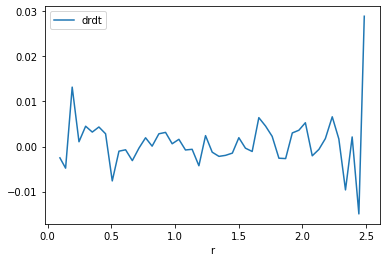

In [75]:
df_boot.plot(x='r',y='drdt')
plt.show()

# DONE: verify numerical inequivalence of trackpy's MSD to simple MSD in numpy. 
DONE: moved everything except the plots to lib.measure.compute_msd_simple.py

In [73]:
def autocorrFFT(x):
    N=len(x)
    F = np.fft.fft(x, n=2*N)  #2*N because of zero-padding
    PSD = F * F.conjugate()
    res = np.fft.ifft(PSD)
    res= (res[:N]).real   #now we have the autocorrelation in convention B
    n=N*np.ones(N)-np.arange(0,N) #divide res(m) by (N-m)
    return res/n #this is the autocorrelation in convention A

def msd_fft(r):
    N=len(r)
    D=np.square(r).sum(axis=1) 
    D=np.append(D,0) 
    S2=sum([autocorrFFT(r[:, i]) for i in range(r.shape[1])])
    Q=2*D.sum()
    S1=np.zeros(N)
    for m in range(N):
        Q=Q-D[m-1]-D[N-m]
        S1[m]=Q/(N-m)
    return S1-2*S2

def msd_straight_forward(r):
    shifts = np.arange(len(r))
    msds = np.zeros(shifts.size)    

    for i, shift in enumerate(shifts):
        diffs = r[:-shift if shift else None] - r[shift:]
        sqdist = np.square(diffs).sum(axis=1)
        msds[i] = sqdist.mean()

    return msds

#test that msd_fft results in msd_straight_forward to machine precision for an unseeded random walk
N=1000
r = np.cumsum(np.random.choice([-1., 0., 1.], size=(N, 11)), axis=0)
assert ( np.isclose(msd_fft(r)-msd_straight_forward(r),0.).all() )
numerical_tolerance=np.mean(msd_fft(r)-msd_straight_forward(r))
print(f"the numerical aggrement between slower and faster methods was numerical_tolerance = {numerical_tolerance}.")


the numerical aggrement between slower and faster methods was numerical_tolerance = -1.4024603700590887e-13.


In [93]:
#TODO(later): use msd_fft on a 2D array where rows:observations::columns:xycoordinate_of_particle
numobs=msd_fft(r).shape[0]



In [85]:
#GOAL:establish numerical equivalency between msd_fft and what I'm currently using
save_folder=nb_dir+f"Data/test_data"
save_fn=save_folder+'/test_msd.csv'

In [86]:
##TODO: generate MSD by saving to some file directory in Data/test_data
input_fn='';kwargs={}
df_msd=comp_each_mean_squared_displacement(df,input_fn,DT,ds,width,
                         minimum_lifetime=0,crop_start_by=0,crop_end_by=0,
                         pid_col='pid',t_col='t',max_lagtime=None,
                         **kwargs)

In [90]:
msd_values.shape

(12000,)

In [91]:
df.head()

,frame,t,n,x,y,pid_explicit
0,1,0.0,16,1.677559,1.411504,0
1,1,0.0,16,0.099638,5.827791,1
2,1,0.0,16,2.570397,4.199396,2
3,1,0.0,16,3.863512,0.903274,3
4,1,0.0,16,7.783294,7.151639,4


In [99]:
DT=1.
dff=pd.DataFrame()
#TODO: give dff a reasonable array of values for each 
dff['frame']=np.arange(numobs)
dff['t']=DT*np.arange(numobs)
dff['n']=1
dff['x']=r[:,2]
dff['y']=r[:,2]
dff['pid_explicit']=np.zeros(numobs)
dff.head()

,frame,t,n,x,y,pid_explicit
0,0,0.0,1,-1.0,-1.0,0.0
1,1,1.0,1,-1.0,-1.0,0.0
2,2,2.0,1,0.0,0.0,0.0
3,3,3.0,1,1.0,1.0,0.0
4,4,4.0,1,2.0,2.0,0.0


In [105]:
##TODO: load ^that MSD data and print as array called my_msd_values
##TODO: compute numerical_tolerance=np.mean(msd_fft(r)-my_msd_values

,frame,t,n,x,y,pid_explicit
0,0,0.0,1,-1.0,-1.0,0.0
1,1,1.0,1,-1.0,-1.0,0.0
2,2,2.0,1,0.0,0.0,0.0
3,3,3.0,1,1.0,1.0,0.0
4,4,4.0,1,2.0,2.0,0.0
...,...,...,...,...,...,...
995,995,995.0,1,-3.0,-3.0,0.0
996,996,996.0,1,-2.0,-2.0,0.0
997,997,997.0,1,-3.0,-3.0,0.0
998,998,998.0,1,-4.0,-4.0,0.0


In [111]:
dft1=pd.DataFrame([dff['t'].min()])
dft2=pd.DataFrame([dff['t'].max()])
lagt_values,msd_values=compute_individual_mean_squared_displacement(dff,dft1,dft2,DT=DT,pid=0,pid_col='pid_explicit')

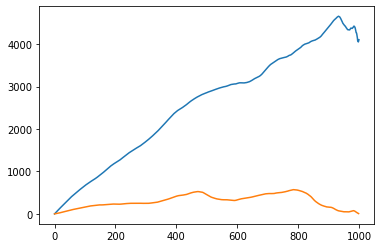

In [125]:
plt.plot(msd_fft(r))
plt.plot(msd_values)

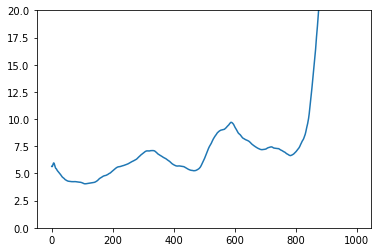

In [140]:
scale=1
plt.plot(msd_fft(r)[1:]/msd_values)
plt.ylim([0,20])
plt.show()

Oh... MSD is an extrinsic measure in physics, but later authors changed it into an intrinsic measure by dividing by a factor of, perhaps, N-m... Nope, the scale between the two appears to change as a function of time, and tends to be off by a factor typically larger than five...

Screw trackpy, let's use the numpy implementation

In [142]:
#TODO: extract r from  dff
my_r=dff[['x','y']].values
msd_values=msd_fft(my_r)
lag_values=DT*np.arange(msd_values.shape[0])

# TODO: dev drdt function to make sure it crops correctly for
- drdt_bulk
- drdt_annihilation

In [12]:
#input_fn is any sort of trajectory .csv file.  it must have a column reffered to by pid_col that uniquely identifies each particle
#Load example particle Log file where I want to compute MSD and tracking has already been done 
#(good): data that uses explicit particle tracking
# input_fn=search_for_file()

#DONE: no attraction, no annihilation
input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"

#TODO: no attraction with annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/Log/pbc_particle_log1_log.csv"

#TODO: attraction with annihilation

#TODO: attraction with annihilation but without diffusion


# input_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
pid_col='pid_explicit'
t_col='t'
#(bad)particle data analyzed using full model pipeline
# input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv"
df=pd.read_csv(input_fn)
kwargs={}
width=10 #width of computational domain
ds   =5  #cm
#from here on, we will use units in terms of those used by the full model
height=width
DS=ds/width
DT=get_DT(df,pid_col=pid_col);print(f"DT={DT} ms")
#print summary stats on particle lifetimes for one input folder
dft=df.groupby(pid_col)[t_col].describe()
df_lifetimes=-dft[['max','min']].T.diff().loc['min']

print(f"printing summary stats on particle lifetimes for one input folder in {trial_folder_name}:")
print(df_lifetimes.describe())
# print(df_lifetimes.head(10))
print("\nPlease manually review the key word arguments in kwargs.")

DT=0.25 ms
printing summary stats on particle lifetimes for one input folder in /home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0:
count      16.0
mean     3000.0
std         0.0
min      3000.0
25%      3000.0
50%      3000.0
75%      3000.0
max      3000.0
Name: min, dtype: float64

Please manually review the key word arguments in kwargs.


In [17]:
#TODO: make compute_event_id return a unique event_id_int for every trial

fn = os.path.basename(input_fn)
# event_id_int = int(float(100*sum([float(s) for s in re.findall(r'-?\d+\.?\d*', fn)])))
event_id_int=100*int(''.join(re.findall(r'-?\d+\.?\d*', fn)))

100

In [9]:
#TODO(later): update this block with the kwargs for get_routine_for_computing_dRdt_in_bulk
# minimum_lifetime=500. #ms
# crop_start_by=0       #ms
# crop_end_by=0         #ms
tmin=0#ms
frame_min=int(tmin/DT) #first frame to consider
# #DONT: implement cropping
# dont_use_older_than  =0  #ms
# dont_use_younger_than=0  #ms

400

In [91]:
#DONE: update routine_for_computing_dRdt_in_bulk to use pid_col instead of particle
#TODO: figure out the conversion from crop_start_by amd crop_end_by for use in routine_for_computing_dRdt_in_bulk
kwargs={
    'DT':DT,
    'ds':ds,
    'width':width,
    'pid_col':pid_col,
    't_col':t_col,
    'use_drop_shorter_than':False,
   'drop_shorter_than':150, #ms
   'round_t_to_n_digits':5,
   'frame_min':frame_min,
   'num_frames_between':1,
   'use_random_frames':False,
   'num_random_frames':50
}

In [4]:
from lib import *
get_routine_for_computing_dRdt_in_bulk?

In [120]:
use_test=False
routine_for_computing_dRdt_in_bulk = get_routine_for_computing_dRdt_in_bulk(**kwargs)
if use_test:
    #optionally test the routine
    retval=routine_for_computing_dRdt_in_bulk(input_fn)
    pd.read_csv(retval).head()

def routine(input_fn):
    try:
        return routine_for_computing_dRdt_in_bulk(input_fn)
    except Exception as e:
        return f"Warning: something went wrong, {e}"

In [121]:
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
npartitions=os.cpu_count()
input_fn_lst=get_log_files(trial_folder_name, extension='/Log/', trgt='.csv')
# input_fn_lst=get_log_files(trial_folder_name, extension='', trgt='.csv')

print(f"We're about to use {npartitions} cores to obliterate {len(input_fn_lst)} trajectory files from {trial_folder_name}")

We're about to use 12 cores to obliterate 200 trajectory files from /home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0


0.03917564841231029


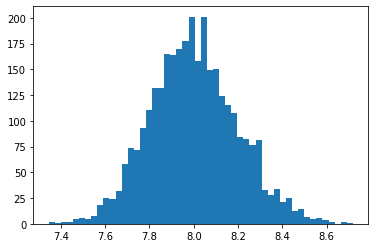

In [128]:
D=2
nobs=200*16
# nobs=100000
t=1
scale=np.sqrt(2*D*1)
msd_lst=[]
for j in range(200*16):
    xv=scale*np.random.normal(size=nobs)
    yv=scale*np.random.normal(size=nobs)
    displacement_values=xv+yv
    msd=np.var(displacement_values)
    msd_lst.append(msd)

    
msd_var=np.var(msd_lst)
plt.hist(msd_lst,bins=50)
print(msd_var)
# msd=np.var(displacement_values)
# plt.hist(displacement_values,bins=50)
# print(msd)
plt.show()

# TODO: bootstrap MSD/lagt

In [130]:
search_for_file()

File: /home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/msd.csv


'/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/msd.csv'

In [131]:
msd_fn='/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/msd.csv'
df_msd=pd.read_csv(msd_fn)
df_msd.head()

,index,pid,lagt,msd
0,0,0,0.25,0.000000
1,1,0,0.50,0.001984
2,2,0,0.75,0.003980
3,3,0,1.00,0.005967
4,4,0,1.25,0.007925


In [149]:
x_values=df_msd['lagt'].values/1000 #lag time in seconds
y_values=df_msd['msd'].values #msd in square centimeters

#i notice msd=0 erroneously when lagt>0. fixing that...
x_values=x_values[:-1]
y_values=y_values[1:]

#make the y-axis MSD/lagt
y_values=y_values / x_values
xlabel='lagt'
ylabel='y'
min_numobs=0
num_bootstrap_samples=1000

In [151]:
#bin and bootstrap results
bins=30#'auto'
npartitions=os.cpu_count()
dict_out = bin_and_bootstrap_xy_values(x=x_values,
                                       y=y_values,
                                       xlabel=xlabel,
                                       ylabel=ylabel,
                                       bins=bins,
                                       min_numobs=min_numobs,
                                       num_bootstrap_samples=num_bootstrap_samples,
                                       npartitions=npartitions)
df_emsd = pd.DataFrame(dict_out)
df_emsd.head()

run time for bootstrapping was 353.77 seconds.


,lagt,y,Delta_lagt,Delta_y,p_lagt,p_y,counts
0,0.050125,10.097897,0.000049,0.022798,0.926412,0.347504,1280000
1,0.150125,10.056951,0.000049,0.022916,0.184116,0.610017,1280000
2,0.250125,10.055923,0.000051,0.024093,0.914841,0.637262,1280000
3,0.350125,10.027191,0.000051,0.024767,0.578623,0.287195,1280000
4,0.450125,9.984307,0.000050,0.023601,0.333673,0.997224,1280000


In [158]:
x=df_emsd['lagt'].values
y=df_emsd['y'].values
y_err=df_emsd['Delta_y'].values

#if ^this fails, then try integrating a full average over particles
plt.errorbar(x,y,y_err)
plt.plot(x,0.*x+8,'k-')
plt.show()

## module for computing D for a given a file with MSD in it

In [164]:
def compute_D(df,xscale=0.001,xmin=0.,xmax=500.):
    #compute the linear fit of bootstrapped msd
    #     df=df_emsd
    #     xscale=0.001 #seconds per ms
    #     xmin=0. #ms
    #     xmax=500 #ms
    xmin*=xscale
    xmax*=xscale
    x_values=df['lagt'].values*xscale
    y_values=df['msd'].values
    x_err_values=df['Delta_lagt'].values
    y_err_values=df['Delta_msd'].values
    counts=df['counts'].values

    #fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
    boo=(x_values>xmin)&(x_values<xmax)
    x=x_values[boo]
    y=y_values[boo]
    dict_force_fit=compute_95CI_ols(x,y)
    y_hat_values=dict_force_fit['b']+dict_force_fit['m']*x_values

    #(optional) rename specific values
    dict_force_fit=dict_force_fit
    y_hat_values=y_hat_values
    D=dict_force_fit['m']/4
    return D
    
#     #bluf
#     print(f"the ols fit for diffusion coefficient, D={:.4f} is:")
#     print_dict(dict_force_fit)
#     print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
#     print(f"trial_folder_name: {trial_folder_name}")

def return_compute_D(fn,bins='auto'):
    df_in=pd.read_csv(fn)
    #extract values
    lagt_values = df_in['lagt'].values
    msd_values = df_in['msd'].values
    #bin and bootstrap results
    #'auto'  #
    df_emsd = bin_and_bootstrap_xy_values(x=lagt_values,
                                           y=msd_values,
                                           xlabel='lagt',
                                           ylabel=r'msd',
                                           bins=bins,
                                           min_numobs=None,
                                           num_bootstrap_samples=1000,
                                           npartitions=npartitions,
                                         printing=False)
    return compute_D(df_emsd)

def geo_mean_overflow(iterable):
    a = np.log(iterable)
    return np.exp(a.mean())

# TODO: measure MSD/tau by taking the ensemble average and never time averaging

In [217]:
# input_fn=search_for_file(os.path.basename(msd_fn))
input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log2_log.csv"
# def return_msd_phys(input_fn):
df=pd.read_csv(input_fn)
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
pid_col='pid_explicit'
t_col='t'
#(bad)particle data analyzed using full model pipeline
# input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv"
kwargs={}
xscale=0.001
width=10 #width of computational domain
ds   =10  #cm
#from here on, we will use units in terms of those used by the full model
height=width
DS=ds/width

#unwrap trajectories
pid_lst = sorted(set(df[pid_col].values))
#(duplicates filtered earlier in full model pipeline.  Unnecessary in particle model with explicit tracking_ _  _ _ ) filter_duplicate_trajectory_indices is slow (and can probs be accelerated with a sexy pandas one liner)
# pid_lst_filtered = filter_duplicate_trajectory_indices(pid_lst,df)
df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, DS, **kwargs) for pid in pid_lst])
DT=get_DT(df,pid_col=pid_col) #ms
df[df.frame==2].describe()

df.head()

df['sd']=df['x']**2+df['y']**2
d_msd=df.groupby('t')['sd'].mean()
lagt_values=d_msd.index.values
msd_values=d_msd.values


2.298820983496281


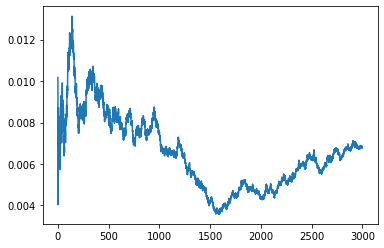

In [228]:
xmin=0
xmax=100
xscale=0.001
lagt_values=d_msd.index.values
msd_values=d_msd.values
xmin*=xscale
xmax*=xscale
x_values=lagt_values*xscale
y_values=msd_values/x_values
# x_err_values=df['Delta_lagt'].values
# y_err_values=df['Delta_msd'].values
# counts=df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(x_values>xmin)&(x_values<xmax)
x=x_values[boo]
y=y_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']*x_values

#(optional) rename specific values
dict_force_fit=dict_force_fit
y_hat_values=y_hat_values
D=dict_force_fit['m']/4
# return D


print(D)
plt.plot(x_values,y_values)
plt.show()

In [197]:
#print summary stats on particle lifetimes for one input folder
dft=df.groupby(pid_col)[t_col].describe()
df_lifetimes=-dft[['max','min']].T.diff().loc['min']
print(f"printing summary stats on particle lifetimes for one input folder in {trial_folder_name}:")
print(df_lifetimes.describe())
# print(df_lifetimes.head(10))
print("\nPlease make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by")

printing summary stats on particle lifetimes for one input folder in /home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0:
count      16.0
mean     3000.0
std         0.0
min      3000.0
25%      3000.0
50%      3000.0
75%      3000.0
max      3000.0
Name: min, dtype: float64

Please make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by


In [195]:
#GOAL: root cause analysis of this jumping scheme
#TODO: make a flower plot for the unwrapped trajecotry of each particle
#TODO: print the jumps for each particle
# pid_lst=sorted(set(df[pid_col].values))
# for pid in pid_lst:
#     print(pid)
#     df[df[pid_col]==pid].plot(x=t_col,y='sd')
df[df[pid_col]==1].plot(x=t_col,y='sd')
plt.show()

KeyError: 'sd'

In [212]:
1

In [215]:
#Conclucsion, the root cause is the particle not being unwrapped correctly.  This should be fixable with a judicious change in parameters
# input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv"
df=pd.read_csv(input_fn)
kwargs={'jump_thresh':5,
       'distance_L2_pbc':get_distance_L2_pbc(width,height)
       }
xscale=0.001
width=10 #width of computational domain
ds   =10  #cm
#from here on, we will use units in terms of those used by the full model
height=width
DS=ds/width

#unwrap trajectories
pid_lst = sorted(set(df[pid_col].values))
pid=1
df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, **kwargs) for pid in pid_lst])

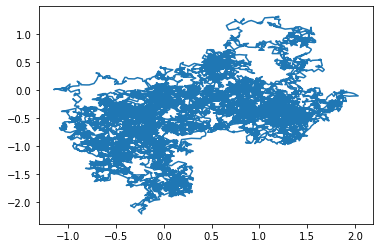

In [216]:
xv,yv=df[df[pid_col]==1][['x','y']].values.T
plt.plot(xv,yv)

# TODO: make a function that takes xyt_values for an unwrapped trajectory and returns lagt_values and msd_values
then,


- TODO: make a dask bag (or maybe cudf-dask) that takes xyt_values, unwraps it according to width,height, and then returns lagt_values and msd_values in the same units as input arguments
- TODO: make routine that bakes one copy of the dataframe and returns the msd_values

In [5]:
#unwrapped FK at DT=0.025 ms
input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/trajectories_unwrap/ic200x200.0.3_traj_sr_600_mem_0_unwrap.csv'
input_fn_lst=get_all_files_matching_pattern(file=input_fn,trgt='_unwrap.csv')
print(len(input_fn_lst))

324


In [17]:
#plot a random trajectory from a random file and verify that it looks reasonable
fn=np.random.choice(input_fn_lst,size=1)[0]
pid_col='particle'
t_col='t'
pid=1000
df=pd.read_csv(fn)
xyt_values=df[df[pid_col]==pid][['x','y','t']].values

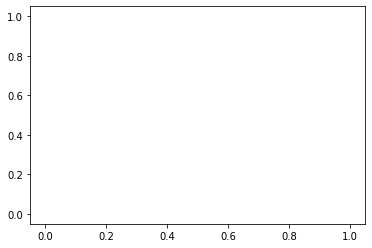

In [18]:
plt.scatter(xyt_values[:,0],xyt_values[:,1],c=xyt_values[:,2],cmap='Blues')

# TODO(later): particle averaged MSD measurements
dev routine that takes a folder of (unwrapped) trajectories and returns the sum and count

# TODO: root cause analysis of enormous msd values appearing in some files

In [3]:
#TODO: plot these functionally
# "/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/bootstrapped_msd_bins_30.csv"

In [4]:
input_fn=f"ic003.22_traj_sr_600_mem_0.csv"
input_fn=f"ic003.22_traj_sr_600_mem_0_unwrap.csv"
trial_folder_name=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025"
# input_fn=f"ic003.22_traj_sr_600_mem_0_unwrap_emsd.csv"
os.chdir(trial_folder_name)
os.chdir('trajectories_unwrap')
df=pd.read_csv(input_fn)
df.head()

,t,n,x,y,grad_ux,grad_uy,grad_vx,grad_vy,frame,particle
0,100.000,8,0.000000,0.000000,0.921823,1.000546,-1.095692,1.028605,0,0
1,100.025,8,-0.009331,0.007201,0.936248,1.000450,-1.105383,1.028733,1,0
2,100.050,8,-0.017975,0.013846,0.951010,1.000349,-1.114780,1.028858,2,0
3,100.075,8,-0.025940,0.019933,0.966093,1.000244,-1.123891,1.028979,3,0
4,100.100,10,-0.033232,0.025458,0.981476,1.000134,-1.132718,1.029096,4,0


In [15]:
input_fn=f"ic003.22_traj_sr_600_mem_0.csv"
trial_folder_name=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025"
# input_fn=f"ic003.22_traj_sr_600_mem_0_unwrap_emsd.csv"
os.chdir(trial_folder_name)
os.chdir('trajectories')
df=pd.read_csv(input_fn)
df.head()

,t,n,x,y,grad_ux,grad_uy,grad_vx,grad_vy,frame,particle
0,100.0,8,1.785796,146.300585,0.921823,1.000546,-1.095692,1.028605,0,0
1,100.0,8,33.337203,50.035993,0.025851,1.662081,1.996952,0.335168,0,1
2,100.0,8,47.254566,148.257986,8.299764,-1.328687,0.435730,1.178769,0,2
3,100.0,8,51.541287,187.861569,-0.605971,1.443102,0.900137,1.027294,0,3
4,100.0,8,62.396859,48.144459,0.842282,1.205703,3.010869,-1.579064,0,4


In [22]:
use_unwrap=True
kwargs={'jump_thresh':20}
#choose use_unwrap=True if the input trajectories are not already unwrapped
if use_unwrap:
    #unwrap trajectories
    pid_lst = sorted(set(df[pid_col].values))
    #(duplicates filtered earlier in full model pipeline.  Unnecessary in particle model with explicit tracking_ _  _ _ ) filter_duplicate_trajectory_indices is slow (and can probs be accelerated with a sexy pandas one liner)
    # pid_lst_filtered = filter_duplicate_trajectory_indices(pid_lst,df)
    df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, **kwargs) for pid in pid_lst])
    DT=get_DT(df,pid_col=pid_col) #ms
    df[df.frame==2].describe()

Exception ignored in: <function WeakValueDictionary.__init__.<locals>.remove at 0x7f6f3770f440>
Traceback (most recent call last):
  File "/home/timothytyree/anaconda3/lib/python3.7/weakref.py", line 109, in remove
    def remove(wr, selfref=ref(self), _atomic_removal=_remove_dead_weakref):
KeyboardInterrupt
Exception ignored in: <function WeakValueDictionary.__init__.<locals>.remove at 0x7f6f3770f440>
Traceback (most recent call last):
  File "/home/timothytyree/anaconda3/lib/python3.7/weakref.py", line 109, in remove
    def remove(wr, selfref=ref(self), _atomic_removal=_remove_dead_weakref):
KeyboardInterrupt


KeyboardInterrupt: 

In [54]:
pid=np.max(pid_lst)

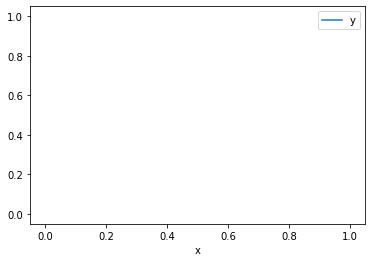

In [55]:
pid_col='particle'
d=df[df[pid_col]==pid]
d.plot(x='x',y='y')
plt.show()

In [56]:
width=200;height=width
pid_col='particle'
pid=100
d=df[df[pid_col]==pid]
numobs=d.x.values.shape[0]
print(numobs)
du=unwrap_traj_and_center(d, width, height, jump_thresh=20)

du.plot(x='x',y='y')
plt.show()

0


AttributeError: 'NoneType' object has no attribute 'plot'

In [26]:
#TODO: get a list of pid's that last at least a threshold amount of time
df_lifetimes
#TODO: in computing MSD, truncate at first jump
#TODO: compute MSD for each remaining particle


(5,)

In [40]:
t_col='t'
#print summary stats on particle lifetimes for one input folder
dft=df.groupby(pid_col)[t_col].describe()
df_lifetimes=-dft[['max','min']].T.diff().loc['min']
print(f"termination time was {df[t_col].max():.2f} ms")

print(f"printing summary stats on particle lifetimes for one input folder in {trial_folder_name}:")
print(df_lifetimes.describe())
# print(df_lifetimes.head(10))
print("\nPlease make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by")

termination time was 3651.83 ms
printing summary stats on particle lifetimes for one input folder in /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025:
count    6421.000000
mean        5.350191
std        13.111925
min        -0.000000
25%         0.100000
50%         0.400000
75%         2.100000
max       193.850000
Name: min, dtype: float64

Please make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by


In [84]:
input_fn=f"ic003.22_traj_sr_600_mem_0.csv"
trial_folder_name=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025"
# input_fn=f"ic003.22_traj_sr_600_mem_0_unwrap_emsd.csv"
os.chdir(trial_folder_name)
os.chdir('trajectories')
df=pd.read_csv(input_fn)
df.head()

,t,n,x,y,grad_ux,grad_uy,grad_vx,grad_vy,frame,particle
0,100.0,8,1.785796,146.300585,0.921823,1.000546,-1.095692,1.028605,0,0
1,100.0,8,33.337203,50.035993,0.025851,1.662081,1.996952,0.335168,0,1
2,100.0,8,47.254566,148.257986,8.299764,-1.328687,0.435730,1.178769,0,2
3,100.0,8,51.541287,187.861569,-0.605971,1.443102,0.900137,1.027294,0,3
4,100.0,8,62.396859,48.144459,0.842282,1.205703,3.010869,-1.579064,0,4


In [85]:
min_dur=150#ms
t_col='t'

#find the spiral tips that last long enough
dft=df.groupby(pid_col)[t_col].describe()
df_lifetimes=-dft[['max','min']].T.diff().loc['min']
pid_long_list=df_lifetimes[df_lifetimes>min_dur].index.values

In [86]:
#unwrap those spiral tips
df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, **kwargs) for pid in pid_long_list])

In [87]:
rount_t_to_n_digits=5
DT=0.025
# DT=np.around(df[t_col].sort_values().diff().dropna().min(),rount_t_to_n_digits)

In [88]:
#truncate trajectories to their first apparent jump (pbc jumps should have been removed already)
ds=5#cm total domain size
jump_thresh=20
DS=ds/width
# DT=get_DT(df,pid_col=pid_col);print(f"DT={DT} ms")

df_lst = []
for pid in pid_long_list:
    d = df[(df[pid_col]==pid)].copy()
    x_values, y_values = d[['x','y']].values.T
    index_values = d.index.values.T
    jump_index_array, spd_lst = find_jumps(x_values,y_values,width,height, DS=DS,DT=DT, **kwargs)#.25)

    #     jump_index_array, spd_lst = find_jumps(x_values,y_values,width,height, DS=DS,DT=DT, jump_thresh=jump_thresh, **kwargs)#.25)
    if len(jump_index_array)>0:
        ji = jump_index_array[0]
        d.drop(index=index_values[ji:], inplace=True)
    df_lst.append(d)
df_traj = pd.concat(df_lst)

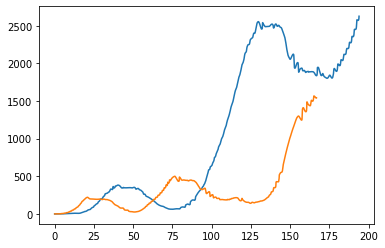

In [94]:
#TODO: compute msd_phys
df=df_traj.copy()
df['sd']=df['x']**2+df['y']**2
# df['lagt']=df[t_col]
sd_lst=[];lagt_lst=[];pid_lst
for pid in pid_long_list:
    #TODO: plot the xy movement of each trajectory under consideration
    d = df[(df[pid_col]==pid)].copy()
    sd_values=d.sd.values
    lagt_values=d[t_col].values-d[t_col].min()
    pid_values=d[pid_col].values
    sd_lst.extend(sd_values)
    lagt_lst.extend(lagt_values)
    pid_lst.extend(pid_values)
    
#     plt.plot(lagt_values,sd_values)
# plt.show()

df_msd_out=pd.DataFrame({
    'lagt':lagt_lst,
    'msd':sd_lst,
    'pid':pid_lst,
})

#TODO: save as csv
#TODO: wrap all ^this into 1 function for computing MSD



In [95]:
#TODO: compute the annihilations for only the pid where I computed msd
pid_long_list

array([1729, 3063])

In [96]:
input_fn=f"ic003.22_traj_sr_600_mem_0.csv"
trial_folder_name=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025"
os.chdir(trial_folder_name)
os.chdir('trajectories')
df=pd.read_csv(input_fn)
df.head()

,t,n,x,y,grad_ux,grad_uy,grad_vx,grad_vy,frame,particle
0,100.0,8,1.785796,146.300585,0.921823,1.000546,-1.095692,1.028605,0,0
1,100.0,8,33.337203,50.035993,0.025851,1.662081,1.996952,0.335168,0,1
2,100.0,8,47.254566,148.257986,8.299764,-1.328687,0.435730,1.178769,0,2
3,100.0,8,51.541287,187.861569,-0.605971,1.443102,0.900137,1.027294,0,3
4,100.0,8,62.396859,48.144459,0.842282,1.205703,3.010869,-1.579064,0,4


In [98]:
# df=pd.read_csv('/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations/ic200x200.0.28_traj_sr_600_mem_0_annihilations.csv')
# df.head()
# df[df.pid==df.pid_deathmate]
# #compute interactions
tmin=100
df_interactions = compute_df_interactions(input_fn, DS=DS,width=width,height=height,tmin=tmin)
# df_interactions.dropna(inplace=True)
# death_ranges = DS * df_interactions.rT.values
# birth_ranges = DS * df_interactions.r0.values
# df_interactions.head()

KeyboardInterrupt: 

In [100]:
using_particle=True
if using_particle:
    df['cid']=df[pid_col]
        
distance_L2_pbc = get_distance_L2_pbc(width=width,height=height)
pid_partner_death, reaction_distance_death, t_of_death = identify_death_partner(df=df,cid=pid,distance_L2_pbc=distance_L2_pbc,pid_col=pid_col)

In [90]:
min_dur=150#ms
df=df_traj
t_col='t'
#print summary stats on particle lifetimes for one input folder
dft=df.groupby(pid_col)[t_col].describe()
df_lifetimes=-dft[['max','min']].T.diff().loc['min']
pid_long_list=df_lifetimes[df_lifetimes>min_dur].index.values

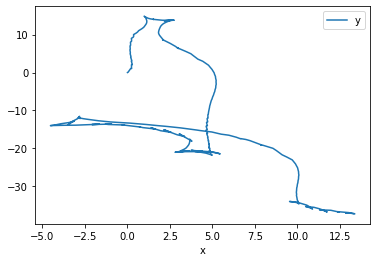

In [83]:
df_lst = []
for pid in pid_long_list:
    d = df[(df.particle==pid)].copy()
    x_values, y_values = d[['x','y']].values.T
    index_values = d.index.values.T
    jump_index_array, spd_lst = find_jumps(x_values,y_values,width,height, DS=DS,DT=DT, **kwargs)#.25)
    
    #     jump_index_array, spd_lst = find_jumps(x_values,y_values,width,height, DS=DS,DT=DT, jump_thresh=jump_thresh, **kwargs)#.25)
    if len(jump_index_array)>0:
        ji = jump_index_array[0]
        d.drop(index=index_values[ji:], inplace=True)
    df_lst.append(d)
df_traj = pd.concat(df_lst)